## 1. Here I import all the packages I need and I load the image I will analyse; I display some basic info about the fits file

In [1]:
import astropy
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
from scipy.stats import norm
import matplotlib.mlab as mlab
import glob
from scipy import ndimage
from scipy.optimize import curve_fit
from astropy.modeling.models import Linear1D
from astropy.table import Table
from matplotlib.patches import Circle

hdu_list_blue = fits.open('m36_blue_60s_2.fits')
hdu_list_green = fits.open('m36_green_60s_2.fits')

#hdu_list.info()
blue = hdu_list_blue[0].data
green = hdu_list_green[0].data #* 2.3 #ADU multiplyed by the gain gives number of p.e.

#rows 1020, columns 1530

## 2. I display the fits image in different colorscales to show how the stars differ from the background level

<IPython.core.display.Javascript object>


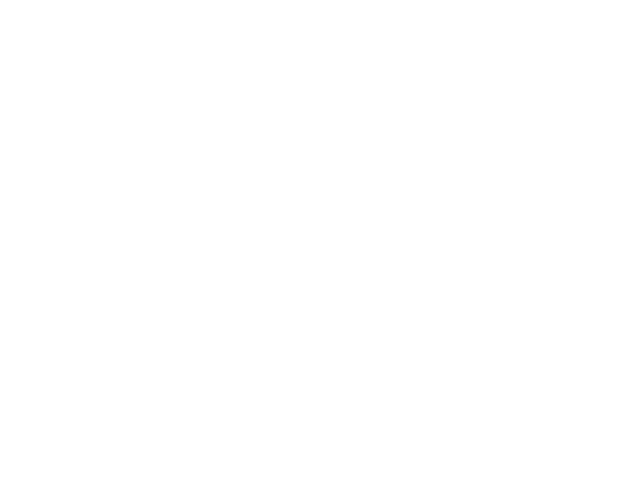

<IPython.core.display.Javascript object>


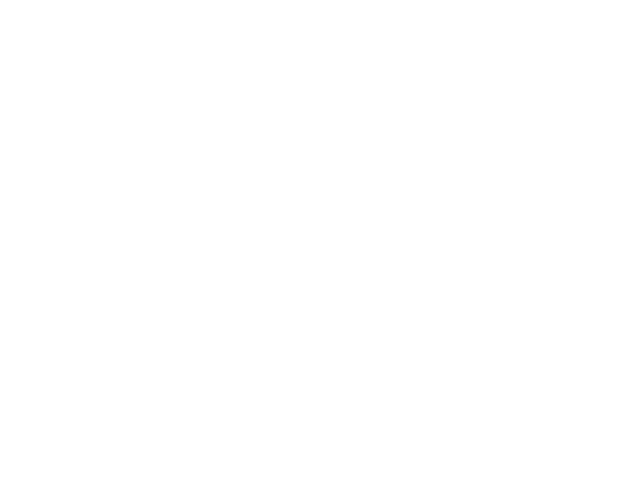

"\nplt.figure()\nplt.title('Red Filter')\nplt.imshow(red, cmap='afmhot_r', origin='lower')\nclb = plt.colorbar()\nclb.set_label('ADU value', rotation=270, labelpad=15)\nplt.clim(0, 2000)\nplt.savefig('red_fits_hot_scale.png')\n"

In [2]:
%matplotlib notebook

plt.figure()
#plt.title('M36 Open Cluster')
plt.imshow(blue, cmap='gray_r', origin='left')
plt.axis('off')
#clb = plt.colorbar(extend='max')
#clb.set_label('ADU value', rotation=270, labelpad=15)
plt.clim(0,4500)
#plt.ylabel('y axis')
#plt.xlabel('x axis')
plt.savefig('m36_blue_fits_grey_scale.png', dpi=200)




plt.figure()
plt.title('Visual Filter')
plt.imshow(green, cmap='gray_r', origin='lower')
plt.clim(0,4500)
clb = plt.colorbar(extend='max')
clb.set_label('ADU value', rotation=270, labelpad=15)
plt.ylabel('y axis')
plt.xlabel('x axis')
plt.savefig('m36_green_fits_grey_scale.png')


'''
plt.figure()
plt.title('Red Filter')
plt.imshow(red, cmap='afmhot_r', origin='lower')
clb = plt.colorbar()
clb.set_label('ADU value', rotation=270, labelpad=15)
plt.clim(0, 2000)
plt.savefig('red_fits_hot_scale.png')
'''



## 4. The background estimation is now done for each pixel, by selecting a 101x101 box and moving it across the image one pixel at time in both x and y direction.

In [3]:
#201 x 201 box


ysize = blue.shape[0]
xsize = blue.shape[1]
#print(image.shape)

bck_b = np.zeros((ysize,xsize))
#print(bck.shape)
#print(bck)

boxSize = 201


for i in range(xsize):
    for j in range(ysize):
        iPrime = i
        jPrime = j
        if i < (boxSize-1)/2:
            iPrime = (boxSize-1)/2
        if xsize - i < (boxSize-1)/2:
            iPrime = xsize - (boxSize-1)/2
        if j < (boxSize+1)/2:
            jPrime = (boxSize-1)/2
        if ysize - j < (boxSize-1)/2:
            jPrime = ysize - (boxSize-1)/2
            
        imin = int(iPrime - (boxSize-1)/2)
        imax = int(iPrime + (boxSize+1)/2)
        jmin = int(jPrime - (boxSize-1)/2)
        jmax = int(jPrime + (boxSize+1)/2)
        
        box = blue[jmin:jmax,imin:imax]
        bck_b[j,i] = np.median(box)
        #print(j,i,bck[j,i])
        
#print(bck)

In [4]:
#201 x 201 box

ysize = green.shape[0]
xsize = green.shape[1]
#print(image.shape)

bck_g = np.zeros((ysize,xsize))
#print(bck.shape)
#print(bck)

boxSize = 201


for i in range(xsize):
    for j in range(ysize):
        iPrime = i
        jPrime = j
        if i < (boxSize-1)/2:
            iPrime = (boxSize-1)/2
        if xsize - i < (boxSize-1)/2:
            iPrime = xsize - (boxSize-1)/2
        if j < (boxSize+1)/2:
            jPrime = (boxSize-1)/2
        if ysize - j < (boxSize-1)/2:
            jPrime = ysize - (boxSize-1)/2
            
        imin = int(iPrime - (boxSize-1)/2)
        imax = int(iPrime + (boxSize+1)/2)
        jmin = int(jPrime - (boxSize-1)/2)
        jmax = int(jPrime + (boxSize+1)/2)
        
        box = green[jmin:jmax,imin:imax]
        bck_g[j,i] = np.median(box)
        #print(j,i,bck[j,i])
        
#print(bck)

## 5. Plot an image with colorbar showing how the background changes, for example next to a star the median value of the pixels should increase.

<IPython.core.display.Javascript object>


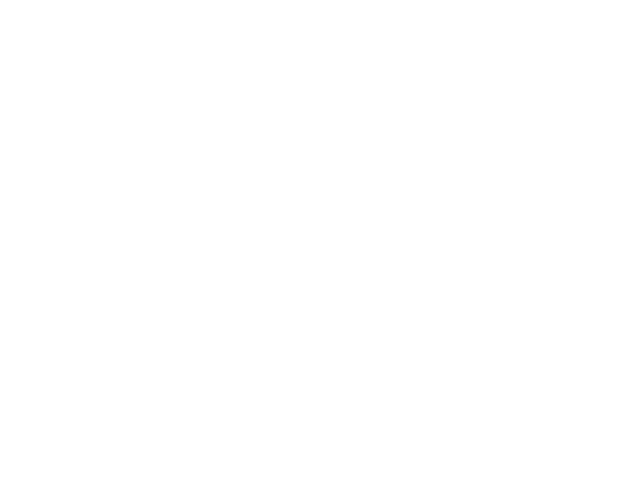

<IPython.core.display.Javascript object>


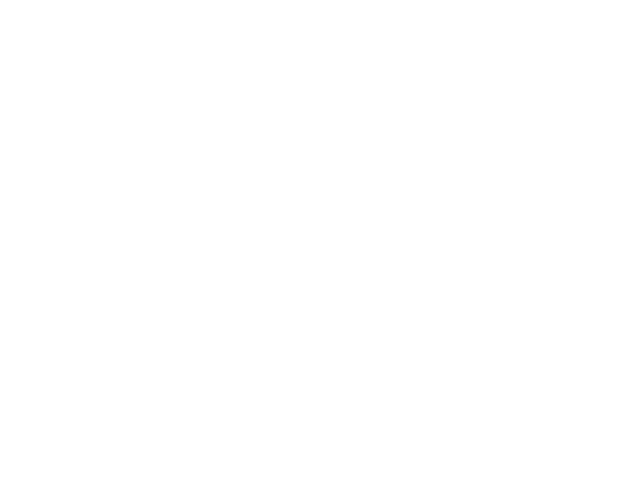

"\nplt.figure()\nplt.title('Background value across the image, green filter')\nplt.imshow(bck_G, cmap='rainbow', origin='lower')\nclb = plt.colorbar()\nclb.set_label('ADU value', rotation=270, labelpad=15)\nplt.ylabel('y axis')\nplt.xlabel('x axis')\n#plt.savefig('m36_background_G.png')\n"

In [5]:
%matplotlib notebook

plt.figure()
plt.title(r'Background value across the image calculated' '\n' r'with a 101$\times$101 box size, B filter')
plt.imshow(bck_b, cmap='rainbow', origin='lower')
clb = plt.colorbar()
clb.set_label('ADU value', rotation=270, labelpad=15)
plt.ylabel('y axis')
plt.xlabel('x axis')
plt.savefig('m36_background_b.png', dpi=200)



'''
plt.figure()
plt.title('Background value across the image, blue filter')
plt.imshow(bck_B, cmap='rainbow', origin='lower')
clb = plt.colorbar()
clb.set_label('ADU value', rotation=270, labelpad=15)
plt.ylabel('y axis')
plt.xlabel('x axis')
#plt.savefig('m36_background_B.png')
'''



plt.figure()
plt.title(r'Background value across the image calculated' '\n' r'with a 101$\times$101 box size, V filter')
plt.imshow(bck_g, cmap='rainbow', origin='lower')
clb = plt.colorbar()
clb.set_label('ADU value', rotation=270, labelpad=15)
plt.ylabel('y axis')
plt.xlabel('x axis')
plt.savefig('m36_background_g.png')

'''
plt.figure()
plt.title('Background value across the image, green filter')
plt.imshow(bck_G, cmap='rainbow', origin='lower')
clb = plt.colorbar()
clb.set_label('ADU value', rotation=270, labelpad=15)
plt.ylabel('y axis')
plt.xlabel('x axis')
#plt.savefig('m36_background_G.png')
'''

## 6. Star finding algorithm. Returns the gaussian histogram of the whole image and a plot showing where the baricenter of each star is located. 

<IPython.core.display.Javascript object>


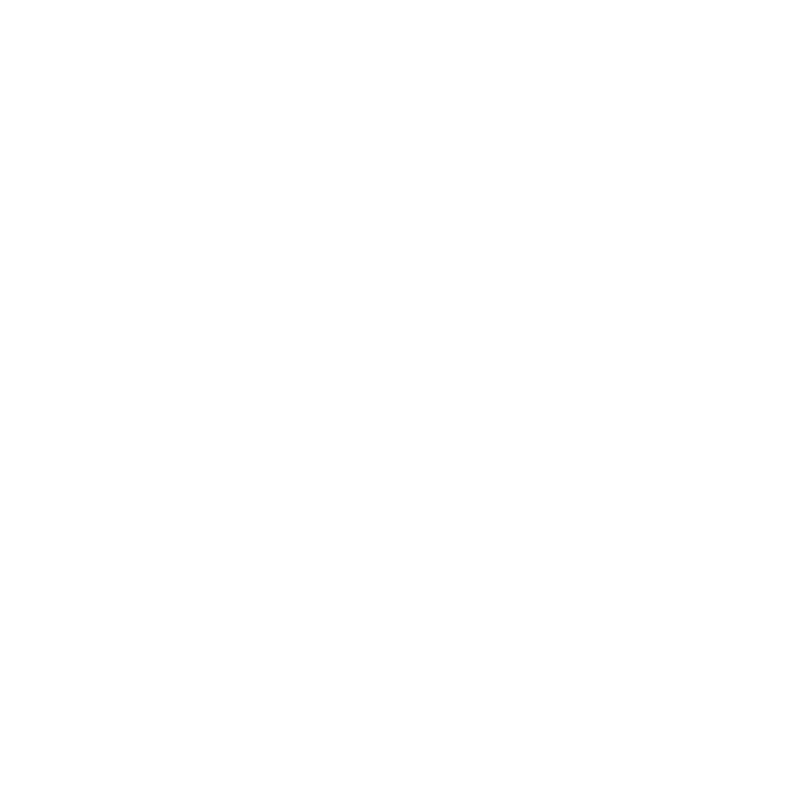


n_t gauss = 1147.1249221501296
number of stars in file: 85


<IPython.core.display.Javascript object>


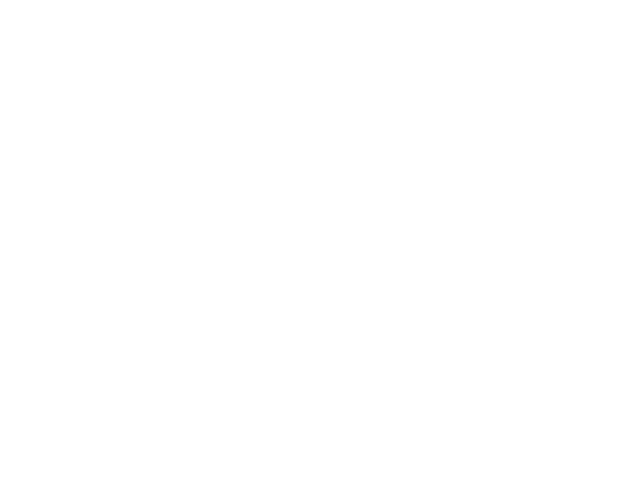

None


In [6]:
#blue filter

%matplotlib notebook
'''
print('\n''mean of image green:', np.mean(green))
print('median of image green:', np.median(green))
print('standard deviation of image green along x axis:', np.std(green[0]))
print('standard deviation of image green along y axis:', np.std(green[1]))
print('standard deviation of image green:', np.std(green))
print('max of image green:', np.max(green))
print('min of image green:', np.min(green))
'''

plt.figure(figsize=(8,8))

# Define fit function.
def gauss(x, A, mu, sigma):
    return (A * np.exp(-1.0 * (x - mu)**2 / (2 * sigma**2)))

# Histogram.
bins = np.linspace(1000, 1200, 51)
data_entries, bins = np.histogram(blue, bins=bins)
binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])

# Fit the function to the histogram data.
popt, pcov = curve_fit(gauss, xdata=binscenters, ydata=data_entries, p0=[140000, 1100, 6])
#print(popt)


# Generate enough x values to make the curves look smooth.
xspace = np.linspace(1000, 1200, 10000)

# Plot the histogram and the fitted function.
plt.bar(binscenters, data_entries, width=bins[1] - bins[0], label='Histogram', edgecolor='k')
plt.plot(xspace, gauss(xspace, *popt), color='r', linewidth=2, label='Fitted Curve: A=%5.3f, $\mu=%5.3f$, $\sigma=%5.3f$' % tuple(popt))
plt.title("Best fit of data with B filter")    
plt.xlabel("ADU Number")
plt.ylabel("Counts") 
plt.legend(loc='upper left')
plt.show()
plt.savefig('m36_histogram_blue.png')


#n_t = np.median(red) + (5 * np.std(red[1]))
#print('\n''n_t red:', n_t)



amplitude = popt[0]
mu = popt[1]
sigma = popt[2]


ysize, xsize = blue.shape
n_t_gauss = mu + (5 * sigma)
print('\n''n_t gauss =', n_t_gauss)






def Count(image):
    xsize,ysize = image.shape
    thresh=1*(image>n_t_gauss)

    
    clustList = [] #list of clusters of pixels (stars)
    for x in range(xsize):
        for y in range(ysize):
            clust=[] #list of pixels in star
            if thresh[x,y]==1: #if pixel value is 1 then fill function called to start finding cluster coordinates
                Fill(thresh,xsize,ysize,x,y, clust) #call fill to begin counting
                clustList.append(clust) #add each cluster found to list of all clusters
       
    
    
    
    global magnitude   
    global baricenter_x_b
    global baricenter_y_b
    global number_of_pixels_in_star
    global pixels_in_circle
    global list_of_clusters
    pixel_value=[]
    coordinates_x=[]
    coordinates_y=[]
    list_of_clusters=[]
    baricenter_x_b=[]
    baricenter_y_b=[]
    size_x = []
    size_y = []
    s_mu_x = []
    s_mu_y = []
    magnitude = []           
    magnitude_error = []
    flux_error = []
    number_of_pixels_in_star = []
    pixels_in_circle = []
    
    
    
    
    
    for pixels in clustList: #pixels is number of coordinates/pixels in a star
        if len(pixels)>5:
            mu=0
            mu_x=0
            mu_y=0
            
            s = 0
            s_x = 0
            s_y = 0
            
            list_of_clusters.append(pixels)
    
            for Coords in pixels:
                x_i = Coords[0]     # coordinates
                y_j = Coords[1]
                n_ij = image[x_i, y_j]   # pixel value at each coordinate
                # print('pixel_value_at_each_coordinate:', n_ij)
                pixel_value.append(n_ij)
                # print ('coords', Coords)     # coordinates of pixels above threshold
                coordinates_x.append(x_i)
                coordinates_y.append(y_j)
                
                # barycenter of each star
                mu = mu+n_ij #total sum
                mu_x = mu_x+(n_ij*x_i) #sum of x
                mu_y = mu_y+(n_ij*y_j) #sum of y
                
                # size of star
                s = s + n_ij
                s_x = s_x + (n_ij * (x_i**2))
                s_y = s_y + (n_ij * (y_j**2))
                
                    
            mu_x = mu_x/mu # weighted average of x positions
            mu_y = mu_y/mu # weighted average of y positions
            baricenter_y_b.append(mu_x)
            baricenter_x_b.append(mu_y)
            
            s_x = (s_x/mu) - (mu_x**2)
            s_y = (s_y/mu) - (mu_y**2)
            size_x.append(s_x)
            size_y.append(s_y)
            
    
            
            for i in list_of_clusters:
                number_of_pixels_in_star = np.size(i)
            #print(number_of_pixels_in_star)
                    
            error_mu_x = s_x/np.sqrt(number_of_pixels_in_star)
            s_mu_x.append(error_mu_x)
                    
            error_mu_y = s_y/np.sqrt(number_of_pixels_in_star)
            s_mu_y.append(error_mu_y)
    



    #print('pixel_value', pixel_value)
    #print('Coordinates_x', coordinates_y)
    #print('Coordinates_y', coordinates_x)
    StarCount=len(list_of_clusters)   #number of stars in file
    print('number of stars in file:', StarCount)
    #print('list of stars in pixel coords:', list_of_clusters)
    #print('y', baricenter_x)
    #print('x', baricenter_y)
    #print('size_x', size_y)
    #print('size_y', size_x)

    
    
    '''
    #flux calculation
    n1=0
    ExpTime=90 #(s), varies
    Gain=2.39  
    FluxList=[] #list of fluxes for each star
    while n1<StarCount:
        Counts=0
        n2=0
        while n2<len(list_of_clusters[n1]): #while within the list of coordinates for star
            Coords_1=list_of_clusters[n1] #list of coordinates in star
            Coords_2=Coords_1[n2]
            Counts=Counts+image[Coords_2[0],Coords_2[1]] #pixel values (counts) in star
            n2=n2+1
        CountsMean=Counts/len(list_of_clusters[n1]) #mean value of counts of each pixel in the star
        Flux=(Gain*CountsMean)/ExpTime
        FluxList.append(Flux) #add each flux to list of fluxes for all stars
        n1=n1+1
        

        
    #plot of blobs   
    plt.figure()
    plt.plot(coordinates_y, coordinates_x,'.',color='black')
    plt.xlim(0, ysize)
    plt.ylim(0, xsize)
    plt.show()
    '''
    
    
    #plot of barycenters
    plt.figure()
    plt.errorbar(baricenter_x_b, baricenter_y_b, xerr = s_mu_x, yerr = s_mu_y, fmt='.', label='stars', ecolor='red')
    plt.xlabel('x axis', fontsize=10)
    plt.ylabel('y axis', fontsize=10)
    plt.title('Stars in the image (B filter)', fontsize=10)
    plt.legend(prop={'size': 10}, loc='lower left')
    plt.xlim(0, ysize)
    plt.ylim(0, xsize)
    plt.show()
    plt.savefig('m36_blue_stars.png')


           
def Fill(image,xsize,ysize,x,y, clust):
    #print x,y,image[x,y]
    if image[x,y] == 0:
        return #if pixel value is zero then ignore
    else: 
        image[x,y]=0 #if pixel value isn't zero then we set it to zero, proof in the image that all stars found when image is blank
        clust.append([x,y])
    if x>0: Fill(image,xsize,ysize,x-1,y, clust)
    if x<(xsize-1): Fill(image,xsize,ysize,x+1,y, clust)
    if y>0: Fill(image,xsize,ysize,x,y-1, clust)
    if y<(ysize-1): Fill(image,xsize,ysize,x,y+1, clust)
        
        
        
print(Count(blue))

<IPython.core.display.Javascript object>


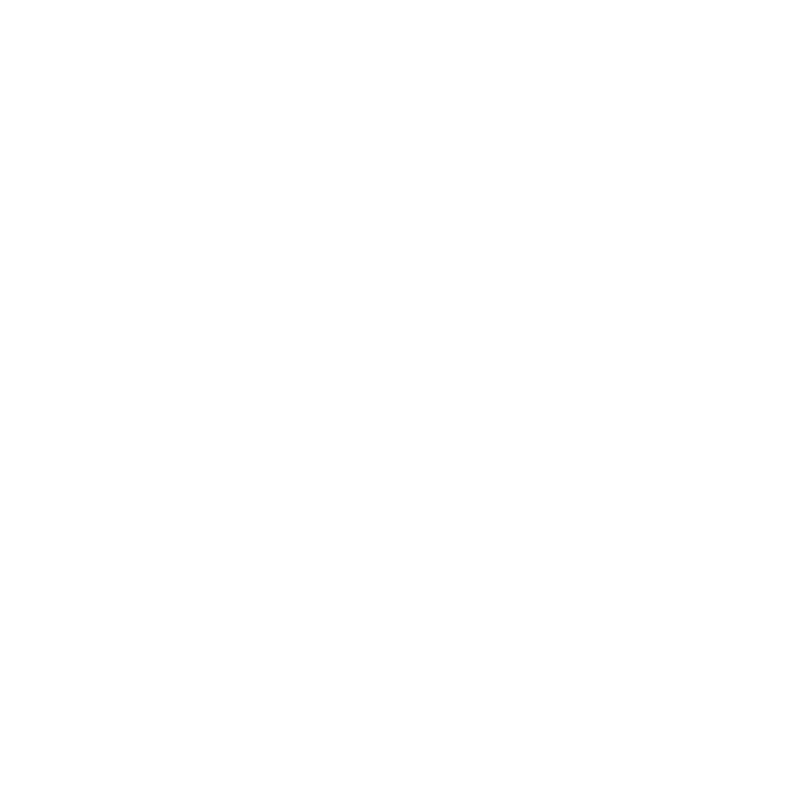


n_t gauss = 1338.0602575575601
number of stars in file: 80


<IPython.core.display.Javascript object>


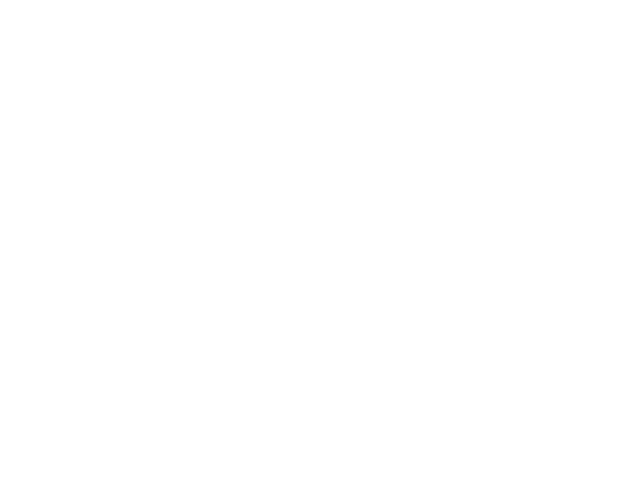

None


In [7]:
#green filter

%matplotlib notebook
'''
print('\n''mean of image green:', np.mean(green))
print('median of image green:', np.median(green))
print('standard deviation of image green along x axis:', np.std(green[0]))
print('standard deviation of image green along y axis:', np.std(green[1]))
print('standard deviation of image green:', np.std(green))
print('max of image green:', np.max(green))
print('min of image green:', np.min(green))
'''

plt.figure(figsize=(8,8))

# Define fit function.
def gauss(x, A, mu, sigma):
    return (A * np.exp(-1.0 * (x - mu)**2 / (2 * sigma**2)))

# Histogram.
bins = np.linspace(1180, 1500, 81)
data_entries, bins = np.histogram(green, bins=bins)
binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])

# Fit the function to the histogram data.
popt, pcov = curve_fit(gauss, xdata=binscenters, ydata=data_entries, p0=[140000, 1250, 6])
#print(popt)


# Generate enough x values to make the curves look smooth.
xspace = np.linspace(1180, 1400, 10000)

# Plot the histogram and the fitted function.
plt.bar(binscenters, data_entries, width=bins[1] - bins[0], label='Histogram', color='green', edgecolor='k')
plt.plot(xspace, gauss(xspace, *popt), color='r', linewidth=2, label='Fitted Curve: A=%5.3f, $\mu=%5.3f$, $\sigma=%5.3f$' % tuple(popt))
plt.title("Best fit of data with V filter")    
plt.xlabel("ADU Number")
plt.ylabel("Counts") 
plt.legend(loc='upper right')
plt.show()
plt.savefig('m36_histogram_green.png')


#n_t = np.median(red) + (5 * np.std(red[1]))
#print('\n''n_t red:', n_t)



amplitude = popt[0]
mu = popt[1]
sigma = popt[2]


ysize, xsize = green.shape
n_t_gauss = mu + (5 * sigma)
print('\n''n_t gauss =', n_t_gauss)






def Count(image):
    xsize,ysize = image.shape
    thresh=1*(image>n_t_gauss)

    
    clustList = [] #list of clusters of pixels (stars)
    for x in range(xsize):
        for y in range(ysize):
            clust=[] #list of pixels in star
            if thresh[x,y]==1: #if pixel value is 1 then fill function called to start finding cluster coordinates
                Fill(thresh,xsize,ysize,x,y, clust) #call fill to begin counting
                clustList.append(clust) #add each cluster found to list of all clusters
       
    
    
    
    global magnitude   
    global baricenter_x_g
    global baricenter_y_g
    global number_of_pixels_in_star
    global pixels_in_circle
    global list_of_clusters
    pixel_value=[]
    coordinates_x=[]
    coordinates_y=[]
    list_of_clusters=[]
    baricenter_x_g=[]
    baricenter_y_g=[]
    size_x = []
    size_y = []
    s_mu_x = []
    s_mu_y = []
    magnitude = []           
    magnitude_error = []
    flux_error = []
    number_of_pixels_in_star = []
    pixels_in_circle = []
    
    
    
    
    
    for pixels in clustList: #pixels is number of coordinates/pixels in a star
        if len(pixels)>5:
            mu=0
            mu_x=0
            mu_y=0
            
            s = 0
            s_x = 0
            s_y = 0
            
            list_of_clusters.append(pixels)
    
            for Coords in pixels:
                x_i = Coords[0]     # coordinates
                y_j = Coords[1]
                n_ij = image[x_i, y_j]   # pixel value at each coordinate
                # print('pixel_value_at_each_coordinate:', n_ij)
                pixel_value.append(n_ij)
                # print ('coords', Coords)     # coordinates of pixels above threshold
                coordinates_x.append(x_i)
                coordinates_y.append(y_j)
                
                # barycenter of each star
                mu = mu+n_ij #total sum
                mu_x = mu_x+(n_ij*x_i) #sum of x
                mu_y = mu_y+(n_ij*y_j) #sum of y
                
                # size of star
                s = s + n_ij
                s_x = s_x + (n_ij * (x_i**2))
                s_y = s_y + (n_ij * (y_j**2))
                
                    
            mu_x = mu_x/mu # weighted average of x positions
            mu_y = mu_y/mu # weighted average of y positions
            baricenter_y_g.append(mu_x)
            baricenter_x_g.append(mu_y)
            
            s_x = (s_x/mu) - (mu_x**2)
            s_y = (s_y/mu) - (mu_y**2)
            size_x.append(s_x)
            size_y.append(s_y)
            
    
            
            for i in list_of_clusters:
                number_of_pixels_in_star = np.size(i)
            #print(number_of_pixels_in_star)
                    
            error_mu_x = s_x/np.sqrt(number_of_pixels_in_star)
            s_mu_x.append(error_mu_x)
                    
            error_mu_y = s_y/np.sqrt(number_of_pixels_in_star)
            s_mu_y.append(error_mu_y)
    



    #print('pixel_value', pixel_value)
    #print('Coordinates_x', coordinates_y)
    #print('Coordinates_y', coordinates_x)
    StarCount=len(list_of_clusters)   #number of stars in file
    print('number of stars in file:', StarCount)
    #print('list of stars in pixel coords:', list_of_clusters)
    #print('y', baricenter_x)
    #print('x', baricenter_y)
    #print('size_x', size_y)
    #print('size_y', size_x)

    
    
    '''
    #flux calculation
    n1=0
    ExpTime=90 #(s), varies
    Gain=2.39  
    FluxList=[] #list of fluxes for each star
    while n1<StarCount:
        Counts=0
        n2=0
        while n2<len(list_of_clusters[n1]): #while within the list of coordinates for star
            Coords_1=list_of_clusters[n1] #list of coordinates in star
            Coords_2=Coords_1[n2]
            Counts=Counts+image[Coords_2[0],Coords_2[1]] #pixel values (counts) in star
            n2=n2+1
        CountsMean=Counts/len(list_of_clusters[n1]) #mean value of counts of each pixel in the star
        Flux=(Gain*CountsMean)/ExpTime
        FluxList.append(Flux) #add each flux to list of fluxes for all stars
        n1=n1+1
        
        
    #magnitude calculation
    for flux in FluxList:
        m_i = -2.5 * np.log10(flux)
        magnitude.append(m_i)
        
        
        #error in flux calculation   
        error_flux_i = np.sqrt(flux)
        flux_error.append(error_flux_i)

    
    #error in magnitude calculation
    for sigma_f in flux_error:
        error_m_i = abs(-2.5/np.log(10)) * (sigma_f/flux)
        magnitude_error.append(error_m_i)
    
    
    
    #table
    r = range(1, StarCount+1, 1)
    a = r
    b = baricenter_y_g
    c = baricenter_x_g
    d = s_mu_x
    e = s_mu_y
    #f = FluxList
    #f1 = flux_error
    g = size_y
    h = size_x
    #i = magnitude
    #i1 = magnitude_error
    
    
    
    t1 = Table([a, c, e], names = ('\n''star number', 'mu_x', 'error in mu_x'))
    #t2 = Table([a, f, f1], names = ('\n' '\n' 'star number', 'flux', 'flux error'))
    t3 = Table([a, b, d], names = ('\n' '\n' 'star number', 'mu_y' , 'error in mu_y'))
    t4 = Table([a, g, h], names = ('\n' '\n' 'star number', 'size along x', 'size along y'))
    #t5 = Table([a, i, i1], names = ('\n' '\n' 'star number', 'magnitude', 'magnitude error'))
    
    #print(t1)
    #print(t3)
    #print(t4)
    #print(t2)
    #print(t5)

        
        
    #plot of blobs   
    #plt.figure()
    #plt.plot(coordinates_y, coordinates_x,'.',color='black')
    #plt.xlim(0, ysize)
    #plt.ylim(0, xsize)
    #plt.show()
    '''
    
    
    #plot of barycenters
    plt.figure()
    plt.errorbar(baricenter_x_g, baricenter_y_g, xerr = s_mu_x, yerr = s_mu_y, fmt='.', label='stars', ecolor='red', color='green')
    plt.xlabel('x axis', fontsize=10)
    plt.ylabel('y axis', fontsize=10)
    plt.title('Stars in the image (V filter)', fontsize=10)
    plt.legend(prop={'size': 10}, loc='lower left')
    plt.xlim(0, ysize)
    plt.ylim(0, xsize)
    plt.show()
    plt.savefig('m36_green_stars.png')


           
def Fill(image,xsize,ysize,x,y, clust):
    #print x,y,image[x,y]
    if image[x,y] == 0:
        return #if pixel value is zero then ignore
    else: 
        image[x,y]=0 #if pixel value isn't zero then we set it to zero, proof in the image that all stars found when image is blank
        clust.append([x,y])
    if x>0: Fill(image,xsize,ysize,x-1,y, clust)
    if x<(xsize-1): Fill(image,xsize,ysize,x+1,y, clust)
    if y>0: Fill(image,xsize,ysize,x,y-1, clust)
    if y<(ysize-1): Fill(image,xsize,ysize,x,y+1, clust)
        
        
        
print(Count(green))

## 7. Enclosing each star in a circle with a fixed radius value, to visualise the star

<IPython.core.display.Javascript object>


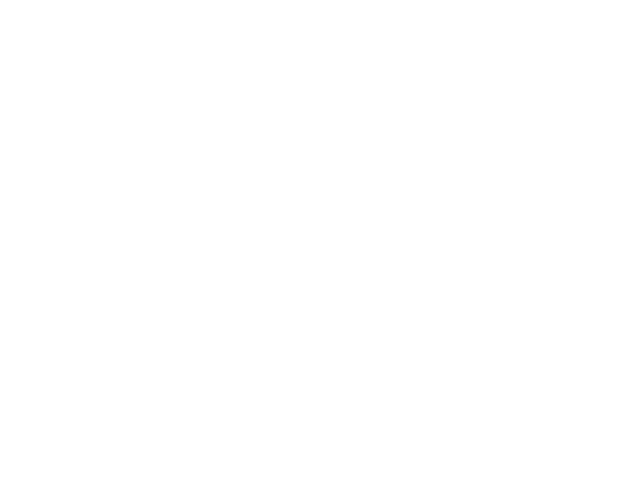

In [8]:
#blue filter

fig,ax = plt.subplots(1)
ax.set_aspect('equal')

plt.imshow(blue, cmap='gray_r', origin='lower')
plt.clim(0,1800)
clb = plt.colorbar(extend='max')
clb.set_label('ADU value', rotation=270, labelpad=15)
plt.ylabel('y axis')
plt.xlabel('x axis')
plt.title('Stars found with B Filter')



# Now, loop through coord arrays, and create a circle at each x,y pair
x = baricenter_x_b
y = baricenter_y_b

for xx,yy in zip(x,y):
    circ = Circle((xx,yy), radius=20, color='b', fill=False)
    ax.add_patch(circ)

plt.show()
plt.savefig('m36_blue_stars_in_circle.png')

<IPython.core.display.Javascript object>


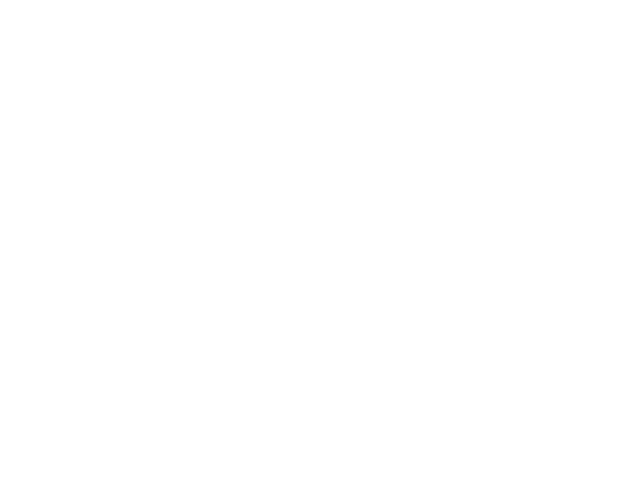

In [9]:
#green filter

fig,ax = plt.subplots(1)
ax.set_aspect('equal')

plt.imshow(green, cmap='gray_r', origin='lower')
plt.clim(0,1800)
clb = plt.colorbar(extend='max')
clb.set_label('ADU value', rotation=270, labelpad=15)
plt.ylabel('y axis')
plt.xlabel('x axis')
plt.title('Stars found with V Filter')

# Now, loop through coord arrays, and create a circle at each x,y pair
x = baricenter_x_g
y = baricenter_y_g

for xx,yy in zip(x,y):
    circ = Circle((xx,yy), radius=20, color='g', fill=False)
    ax.add_patch(circ)

plt.show()
plt.savefig('m36_green_stars_in_circle.png')

## 8. Identify some stars of interest and see that some of their circles overlap

<IPython.core.display.Javascript object>


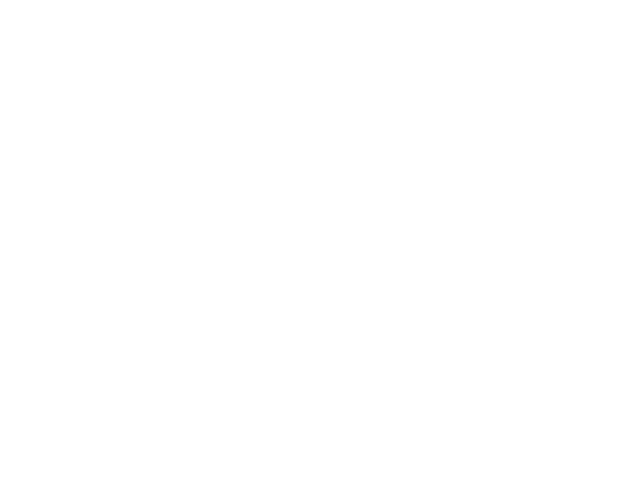

In [10]:
#blue filter

fig,ax = plt.subplots(1)
ax.set_aspect('equal')

plt.imshow(blue, cmap='gray_r', origin='lower')
plt.clim(0,2000)
clb = plt.colorbar(extend='max')
clb.set_label('ADU value', rotation=270, labelpad=15)
plt.ylabel('y axis')
plt.xlabel('x axis')


#double star counted as just one star
x = baricenter_x_b[66]
y = baricenter_y_b[66]
#for xx,yy in zip(x,y):
circ = Circle((x,y), radius=30, color='b', fill=False)
ax.add_patch(circ)
circ = Circle((x,y), radius=100, color='b', fill=False)
ax.add_patch(circ)



x = baricenter_x_b[58]
y = baricenter_y_b[58]
#for xx,yy in zip(x,y):
circ = Circle((x,y), radius=30, color='orange', fill=False)
ax.add_patch(circ)
circ = Circle((x,y), radius=100, color='orange', fill=False)
ax.add_patch(circ)



x = baricenter_x_b[56]
y = baricenter_y_b[56]
#for xx,yy in zip(x,y):
circ = Circle((x,y), radius=30, color='r', fill=False)
ax.add_patch(circ)
circ = Circle((x,y), radius=100, color='r', fill=False)
ax.add_patch(circ)


x = baricenter_x_b[23]
y = baricenter_y_b[23]
#for xx,yy in zip(x,y):
circ = Circle((x,y), radius=30, color='g', fill=False)
ax.add_patch(circ)
circ = Circle((x,y), radius=100, color='g', fill=False)
ax.add_patch(circ)

x = baricenter_x_b[36]
y = baricenter_y_b[36]
#for xx,yy in zip(x,y):
circ = Circle((x,y), radius=30, color='m', fill=False)
ax.add_patch(circ)
circ = Circle((x,y), radius=100, color='m', fill=False)
ax.add_patch(circ)


plt.title('Stars of interest, B filter')
plt.text(300,716, 'Radius=100px', color='w')
plt.arrow(497,708,-69,-105, head_width=20, color='w')
plt.text(1120,705, 'Radius=30px', color='w')
plt.arrow(1322,700,-114,-117, head_width=20, color='w')
plt.show()
plt.savefig('m36_blue_stars_of_interest.png')

<IPython.core.display.Javascript object>


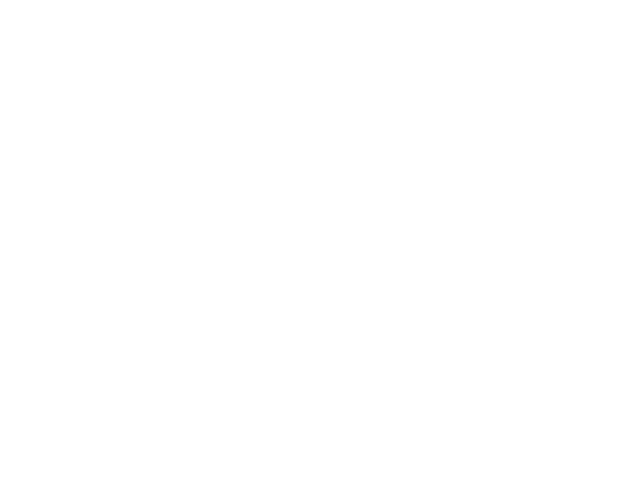

In [11]:
#green filter

fig,ax = plt.subplots(1)
ax.set_aspect('equal')

plt.imshow(green, cmap='gray_r', origin='lower')
plt.clim(0,2000)
clb = plt.colorbar(extend='max')
clb.set_label('ADU value', rotation=270, labelpad=15)
plt.ylabel('y axis')
plt.xlabel('x axis')


#double star counted as just one star
x = baricenter_x_g[63]
y = baricenter_y_g[63]
#for xx,yy in zip(x,y):
circ = Circle((x,y), radius=30, color='b', fill=False)
ax.add_patch(circ)
circ = Circle((x,y), radius=100, color='b', fill=False)
ax.add_patch(circ)



x = baricenter_x_g[55]
y = baricenter_y_g[55]
#for xx,yy in zip(x,y):
circ = Circle((x,y), radius=30, color='y', fill=False)
ax.add_patch(circ)
circ = Circle((x,y), radius=100, color='y', fill=False)
ax.add_patch(circ)



x = baricenter_x_g[53]
y = baricenter_y_g[53]
#for xx,yy in zip(x,y):
circ = Circle((x,y), radius=30, color='r', fill=False)
ax.add_patch(circ)
circ = Circle((x,y), radius=100, color='r', fill=False)
ax.add_patch(circ)


x = baricenter_x_g[22]
y = baricenter_y_g[22]
#for xx,yy in zip(x,y):
circ = Circle((x,y), radius=30, color='g', fill=False)
ax.add_patch(circ)
circ = Circle((x,y), radius=100, color='g', fill=False)
ax.add_patch(circ)


plt.title('Stars of interest, V filter')
plt.show()
plt.text(300,716, 'Radius=100px', color='w')
plt.arrow(497,708,-69,-105, head_width=20, color='w')
plt.text(1120,705, 'Radius=30px', color='w')
plt.arrow(1322,700,-114,-117, head_width=20, color='w')
plt.savefig('m36_green_stars_of_interest.png')

## 9. Plot of flux against radius for the stars of interest to find out what is the best radius to use to calculate the flux of each star (such that additional flux from a nearby star is not taken into account)

<IPython.core.display.Javascript object>


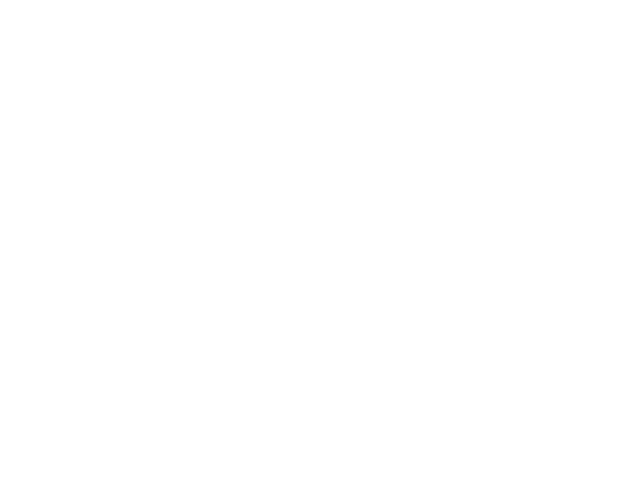

/Users/arianna/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [12]:
#blue filter
%matplotlib notebook

radius = np.arange(1,101,1)

mu_x = baricenter_x_b[66]
mu_y = baricenter_y_b[66]

flux_b = []

for r in range(len(radius)):
    flux = 0
    iMin = int(mu_x) - radius[r] - 1
    iMax = int(mu_x) + radius[r] + 1
    jMin = int(mu_y) - radius[r] - 1
    jMax = int(mu_y) + radius[r] + 1
    for j in range(jMin, jMax, 1):
        for i in range(iMin, iMax, 1):
            if (int(mu_x) - i)**2 + (int(mu_y) - j)**2 < radius[r]**2:
                gain = 2.39
                flux = (flux + (blue[j,i] - bck_b[j,i]))
                Flux = flux*gain
    flux_b.append(Flux)


    
    
    
mu_x = baricenter_x_b[58]
mu_y = baricenter_y_b[58]

flux_y = []

for r in range(len(radius)):
    flux = 0
    iMin = int(mu_x) - radius[r] - 1
    iMax = int(mu_x) + radius[r] + 1
    jMin = int(mu_y) - radius[r] - 1
    jMax = int(mu_y) + radius[r] + 1
    for j in range(jMin, jMax, 1):
        for i in range(iMin, iMax, 1):
            if (int(mu_x) - i)**2 + (int(mu_y) - j)**2 < radius[r]**2:
                gain = 2.39
                flux = (flux + (blue[j,i] - bck_b[j,i]))
                Flux = flux*gain
    flux_y.append(Flux)

    
    
    
    
    
mu_x = baricenter_x_b[56]
mu_y = baricenter_y_b[56]

flux_r = []

for r in range(len(radius)):
    flux = 0
    iMin = int(mu_x) - radius[r] - 1
    iMax = int(mu_x) + radius[r] + 1
    jMin = int(mu_y) - radius[r] - 1
    jMax = int(mu_y) + radius[r] + 1
    for j in range(jMin, jMax, 1):
        for i in range(iMin, iMax, 1):
            if (int(mu_x) - i)**2 + (int(mu_y) - j)**2 < radius[r]**2:
                gain = 2.39
                flux = (flux + (blue[j,i] - bck_b[j,i]))
                Flux = flux*gain
    flux_r.append(Flux)
    

    
    
mu_x = baricenter_x_b[23]
mu_y = baricenter_y_b[23]

flux_green = []

for r in range(len(radius)):
    flux = 0
    iMin = int(mu_x) - radius[r] - 1
    iMax = int(mu_x) + radius[r] + 1
    jMin = int(mu_y) - radius[r] - 1
    jMax = int(mu_y) + radius[r] + 1
    for j in range(jMin, jMax, 1):
        for i in range(iMin, iMax, 1):
            if (int(mu_x) - i)**2 + (int(mu_y) - j)**2 < radius[r]**2:
                gain = 2.39
                flux = (flux + (blue[j,i] - bck_b[j,i]))
                Flux = flux*gain
    flux_green.append(Flux)
    

mu_x = baricenter_x_b[36]
mu_y = baricenter_y_b[36]

flux_bri = []

for r in range(len(radius)):
    flux = 0
    iMin = int(mu_x) - radius[r] - 1
    iMax = int(mu_x) + radius[r] + 1
    jMin = int(mu_y) - radius[r] - 1
    jMax = int(mu_y) + radius[r] + 1
    for j in range(jMin, jMax, 1):
        for i in range(iMin, iMax, 1):
            if (int(mu_x) - i)**2 + (int(mu_y) - j)**2 < radius[r]**2:
                gain = 2.39
                flux = (flux + (blue[j,i] - bck_b[j,i]))
                Flux = flux*gain
    flux_bri.append(Flux)
    


    
    
    
plt.figure()
plt.plot(radius, flux_b, '.', color='blue', label='star 1')
plt.plot(radius, flux_y, '.', color='orange', label='star 2')
plt.plot(radius, flux_r, '.', color='red', label='star 3')
plt.plot(radius, flux_green, '.', color='green', label='star 4')
plt.plot(radius, flux_bri, '.', color='m', label='star 5')
plt.axvline(12, color='k', linestyle='dashed', linewidth=1, label='Best Radius = 12 pixels')
plt.ylabel('Flux of star F (photoelectrons)')
plt.tick_params(axis='y', which='both', labelleft='off', labelright='on', labelsize='small', left='off', right='on')
plt.xlabel('Radius R (pixels)')
plt.title('Flux as a function of aperture with varying radius''\n''(B filter)')
plt.legend(loc='upper left')
plt.show()
plt.savefig('m36_blue_fluxes.png', dpi=200)

<IPython.core.display.Javascript object>


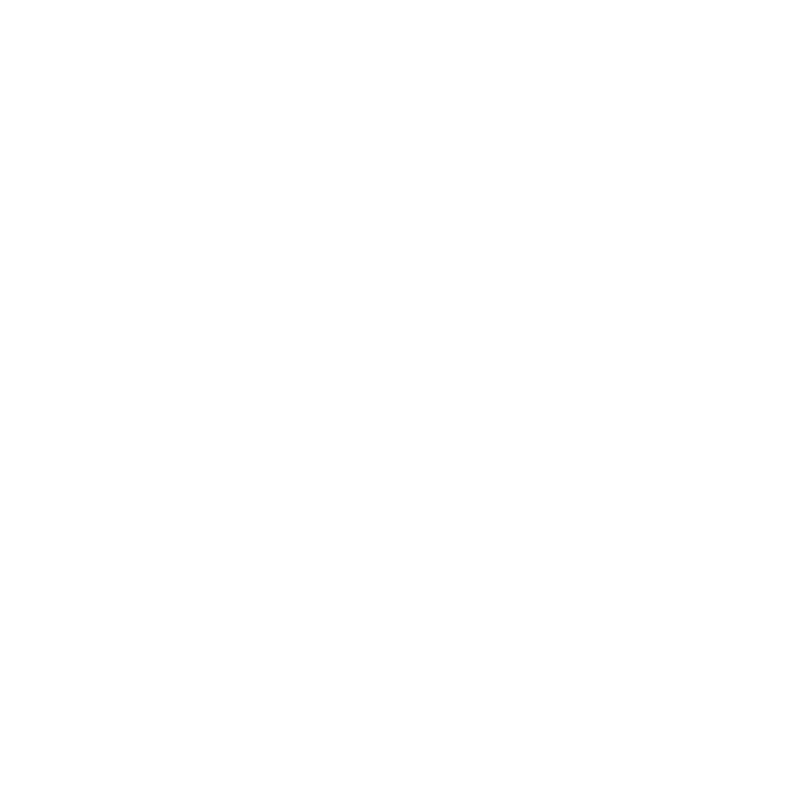

In [13]:
#blue filter, smaller range of radii
%matplotlib notebook

radius = np.arange(1,31,1)

mu_x = baricenter_x_b[66]
mu_y = baricenter_y_b[66]

flux_b = []

for r in range(len(radius)):
    flux = 0
    iMin = int(mu_x) - radius[r] - 1
    iMax = int(mu_x) + radius[r] + 1
    jMin = int(mu_y) - radius[r] - 1
    jMax = int(mu_y) + radius[r] + 1
    for j in range(jMin, jMax, 1):
        for i in range(iMin, iMax, 1):
            if (int(mu_x) - i)**2 + (int(mu_y) - j)**2 < radius[r]**2:
                gain = 2.39
                flux = (flux + (blue[j,i] - bck_b[j,i]))
                Flux = flux*gain
    flux_b.append(Flux)


    
    
    
mu_x = baricenter_x_b[58]
mu_y = baricenter_y_b[58]

flux_y = []

for r in range(len(radius)):
    flux = 0
    iMin = int(mu_x) - radius[r] - 1
    iMax = int(mu_x) + radius[r] + 1
    jMin = int(mu_y) - radius[r] - 1
    jMax = int(mu_y) + radius[r] + 1
    for j in range(jMin, jMax, 1):
        for i in range(iMin, iMax, 1):
            if (int(mu_x) - i)**2 + (int(mu_y) - j)**2 < radius[r]**2:
                gain = 2.39
                flux = (flux + (blue[j,i] - bck_b[j,i]))
                Flux = flux*gain
    flux_y.append(Flux)

    
    
    
    
    
mu_x = baricenter_x_b[56]
mu_y = baricenter_y_b[56]

flux_r = []

for r in range(len(radius)):
    flux = 0
    iMin = int(mu_x) - radius[r] - 1
    iMax = int(mu_x) + radius[r] + 1
    jMin = int(mu_y) - radius[r] - 1
    jMax = int(mu_y) + radius[r] + 1
    for j in range(jMin, jMax, 1):
        for i in range(iMin, iMax, 1):
            if (int(mu_x) - i)**2 + (int(mu_y) - j)**2 < radius[r]**2:
                gain = 2.39
                flux = (flux + (blue[j,i] - bck_b[j,i]))
                Flux = flux*gain
    flux_r.append(Flux)
    

    
    
mu_x = baricenter_x_b[23]
mu_y = baricenter_y_b[23]

flux_green = []

for r in range(len(radius)):
    flux = 0
    iMin = int(mu_x) - radius[r] - 1
    iMax = int(mu_x) + radius[r] + 1
    jMin = int(mu_y) - radius[r] - 1
    jMax = int(mu_y) + radius[r] + 1
    for j in range(jMin, jMax, 1):
        for i in range(iMin, iMax, 1):
            if (int(mu_x) - i)**2 + (int(mu_y) - j)**2 < radius[r]**2:
                gain = 2.39
                flux = (flux + (blue[j,i] - bck_b[j,i]))
                Flux = flux*gain
    flux_green.append(Flux)
    

    
mu_x = baricenter_x_b[36]
mu_y = baricenter_y_b[36]

flux_bri = []

for r in range(len(radius)):
    flux = 0
    iMin = int(mu_x) - radius[r] - 1
    iMax = int(mu_x) + radius[r] + 1
    jMin = int(mu_y) - radius[r] - 1
    jMax = int(mu_y) + radius[r] + 1
    for j in range(jMin, jMax, 1):
        for i in range(iMin, iMax, 1):
            if (int(mu_x) - i)**2 + (int(mu_y) - j)**2 < radius[r]**2:
                gain = 2.39
                flux = (flux + (blue[j,i] - bck_b[j,i]))
                Flux = flux*gain
    flux_bri.append(Flux)
    
    
    
plt.figure(figsize=(8,8))
plt.plot(radius, flux_b, '.', color='blue', label='star 1')
plt.plot(radius, flux_y, '.', color='orange', label='star 2')
plt.plot(radius, flux_r, '.', color='red', label='star 3')
plt.plot(radius, flux_green, '.', color='green', label='star 4')
plt.plot(radius, flux_bri, '.', color='m', label='star 5')


#plt.axvline(17, color='k', linestyle='dashed', linewidth=1, label='Best Radius')
plt.axvline(12, color='k', linestyle='dashed', linewidth=1, label='Best Radius = 12 pixels')


plt.ylabel('Flux of star (photoelectrons)', ha='left', va='top', labelpad = 12)
plt.xlabel('Radius R (pixels)')
plt.title('Flux as a function of aperture with varying radius''\n''(B filter)')
plt.legend()
plt.show()
plt.savefig('m36_blue_fluxes_smaller_r.png')

<IPython.core.display.Javascript object>


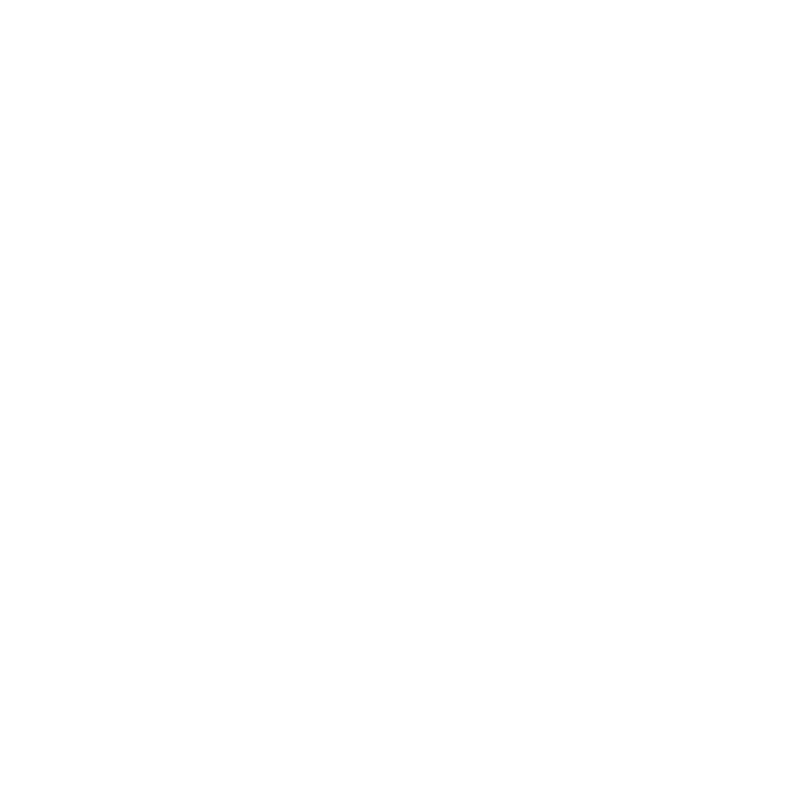

In [14]:
#green filter
%matplotlib notebook

radius = np.arange(1,101,1)

mu_x = baricenter_x_g[63]
mu_y = baricenter_y_g[63]

flux_b = []

for r in range(len(radius)):
    flux = 0
    iMin = int(mu_x) - radius[r] - 1
    iMax = int(mu_x) + radius[r] + 1
    jMin = int(mu_y) - radius[r] - 1
    jMax = int(mu_y) + radius[r] + 1
    for j in range(jMin, jMax, 1):
        for i in range(iMin, iMax, 1):
            if (int(mu_x) - i)**2 + (int(mu_y) - j)**2 < radius[r]**2:
                gain = 2.39
                flux = flux + (green[j,i] - bck_g[j,i])
                Flux = flux*gain
    flux_b.append(Flux)


    
    
    
mu_x = baricenter_x_g[55]
mu_y = baricenter_y_g[55]

flux_y = []

for r in range(len(radius)):
    flux = 0
    iMin = int(mu_x) - radius[r] - 1
    iMax = int(mu_x) + radius[r] + 1
    jMin = int(mu_y) - radius[r] - 1
    jMax = int(mu_y) + radius[r] + 1
    for j in range(jMin, jMax, 1):
        for i in range(iMin, iMax, 1):
            if (int(mu_x) - i)**2 + (int(mu_y) - j)**2 < radius[r]**2:
                gain = 2.39
                flux = flux + (green[j,i] - bck_g[j,i])
                Flux = flux*gain
    flux_y.append(Flux)

    
    
    
    
    
mu_x = baricenter_x_g[53]
mu_y = baricenter_y_g[53]

flux_r = []

for r in range(len(radius)):
    flux = 0
    iMin = int(mu_x) - radius[r] - 1
    iMax = int(mu_x) + radius[r] + 1
    jMin = int(mu_y) - radius[r] - 1
    jMax = int(mu_y) + radius[r] + 1
    for j in range(jMin, jMax, 1):
        for i in range(iMin, iMax, 1):
            if (int(mu_x) - i)**2 + (int(mu_y) - j)**2 < radius[r]**2:
                gain = 2.39
                flux = flux + (green[j,i] - bck_g[j,i])
                Flux = flux*gain
    flux_r.append(Flux)
    
    
    
mu_x = baricenter_x_g[22]
mu_y = baricenter_y_g[22]

flux_green = []

for r in range(len(radius)):
    flux = 0
    iMin = int(mu_x) - radius[r] - 1
    iMax = int(mu_x) + radius[r] + 1
    jMin = int(mu_y) - radius[r] - 1
    jMax = int(mu_y) + radius[r] + 1
    for j in range(jMin, jMax, 1):
        for i in range(iMin, iMax, 1):
            if (int(mu_x) - i)**2 + (int(mu_y) - j)**2 < radius[r]**2:
                gain = 2.39
                flux = flux + (green[j,i] - bck_g[j,i])
                Flux = flux*gain
    flux_green.append(Flux)
    
    
    
plt.figure(figsize=(8,8))
plt.plot(radius, flux_b, '.', color='blue', label='star 1')
plt.plot(radius, flux_y, '.', color='yellow', label='star 2')
plt.plot(radius, flux_r, '.', color='red', label='star 3')
plt.plot(radius, flux_green, '.', color='g', label='star 4')
plt.ylabel('Flux of star (photoelectrons)', ha='left', va='top', labelpad = 13)
plt.xlabel('Radius R (number of pixels)')
plt.title('Flux as a function of aperture with varying radius''\n''(V filter)')
plt.legend()
plt.show()
plt.savefig('m36_green_fluxes.png')

<IPython.core.display.Javascript object>


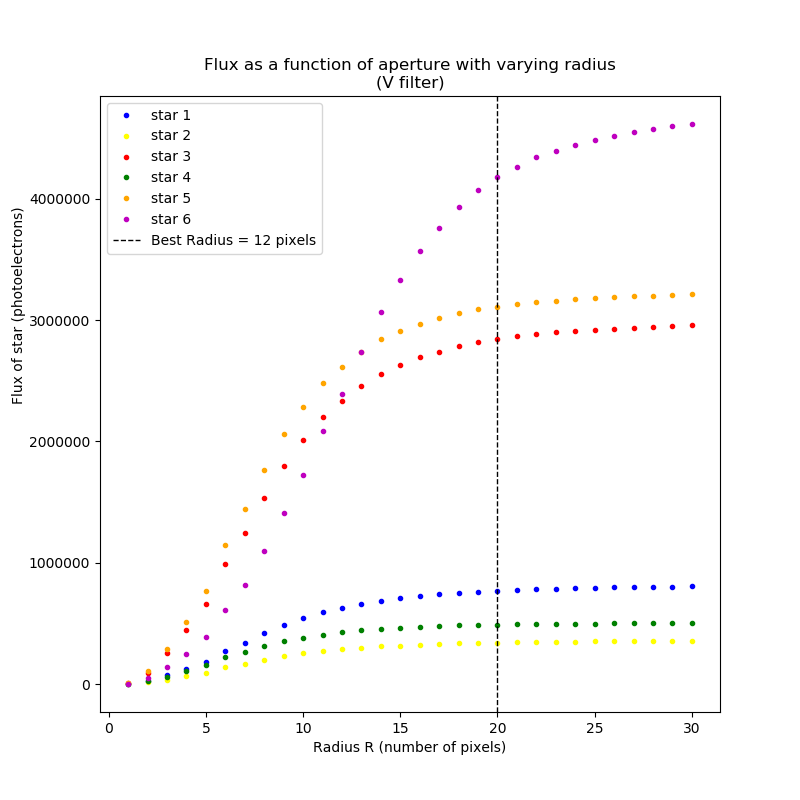

In [15]:
#green filter
%matplotlib notebook

radius = np.arange(1,31,1)

mu_x = baricenter_x_g[63]
mu_y = baricenter_y_g[63]

flux_b = []

for r in range(len(radius)):
    flux = 0
    iMin = int(mu_x) - radius[r] - 1
    iMax = int(mu_x) + radius[r] + 1
    jMin = int(mu_y) - radius[r] - 1
    jMax = int(mu_y) + radius[r] + 1
    for j in range(jMin, jMax, 1):
        for i in range(iMin, iMax, 1):
            if (int(mu_x) - i)**2 + (int(mu_y) - j)**2 < radius[r]**2:
                gain = 2.39
                flux = flux + (green[j,i] - bck_g[j,i])
                Flux = flux*gain
    flux_b.append(Flux)


    
    
    
mu_x = baricenter_x_g[55]
mu_y = baricenter_y_g[55]

flux_y = []

for r in range(len(radius)):
    flux = 0
    iMin = int(mu_x) - radius[r] - 1
    iMax = int(mu_x) + radius[r] + 1
    jMin = int(mu_y) - radius[r] - 1
    jMax = int(mu_y) + radius[r] + 1
    for j in range(jMin, jMax, 1):
        for i in range(iMin, iMax, 1):
            if (int(mu_x) - i)**2 + (int(mu_y) - j)**2 < radius[r]**2:
                gain = 2.39
                flux = flux + (green[j,i] - bck_g[j,i])
                Flux = flux*gain
    flux_y.append(Flux)

    
    
    
    
    
mu_x = baricenter_x_g[53]
mu_y = baricenter_y_g[53]

flux_r = []

for r in range(len(radius)):
    flux = 0
    iMin = int(mu_x) - radius[r] - 1
    iMax = int(mu_x) + radius[r] + 1
    jMin = int(mu_y) - radius[r] - 1
    jMax = int(mu_y) + radius[r] + 1
    for j in range(jMin, jMax, 1):
        for i in range(iMin, iMax, 1):
            if (int(mu_x) - i)**2 + (int(mu_y) - j)**2 < radius[r]**2:
                gain = 2.39
                flux = flux + (green[j,i] - bck_g[j,i])
                Flux = flux*gain
    flux_r.append(Flux)
    
    
    
mu_x = baricenter_x_g[22]
mu_y = baricenter_y_g[22]

flux_green = []

for r in range(len(radius)):
    flux = 0
    iMin = int(mu_x) - radius[r] - 1
    iMax = int(mu_x) + radius[r] + 1
    jMin = int(mu_y) - radius[r] - 1
    jMax = int(mu_y) + radius[r] + 1
    for j in range(jMin, jMax, 1):
        for i in range(iMin, iMax, 1):
            if (int(mu_x) - i)**2 + (int(mu_y) - j)**2 < radius[r]**2:
                gain = 2.39
                flux = flux + (green[j,i] - bck_g[j,i])
                Flux = flux*gain
    flux_green.append(Flux)


    
mu_x = baricenter_x_g[33]
mu_y = baricenter_y_g[33]

flux_bri = []

for r in range(len(radius)):
    flux = 0
    iMin = int(mu_x) - radius[r] - 1
    iMax = int(mu_x) + radius[r] + 1
    jMin = int(mu_y) - radius[r] - 1
    jMax = int(mu_y) + radius[r] + 1
    for j in range(jMin, jMax, 1):
        for i in range(iMin, iMax, 1):
            if (int(mu_x) - i)**2 + (int(mu_y) - j)**2 < radius[r]**2:
                gain = 2.39
                flux = flux + (green[j,i] - bck_g[j,i])
                Flux = flux*gain
    flux_bri.append(Flux)
    
    
mu_x = baricenter_x_g[29]
mu_y = baricenter_y_g[29]

flux_br = []

for r in range(len(radius)):
    flux = 0
    iMin = int(mu_x) - radius[r] - 1
    iMax = int(mu_x) + radius[r] + 1
    jMin = int(mu_y) - radius[r] - 1
    jMax = int(mu_y) + radius[r] + 1
    for j in range(jMin, jMax, 1):
        for i in range(iMin, iMax, 1):
            if (int(mu_x) - i)**2 + (int(mu_y) - j)**2 < radius[r]**2:
                gain = 2.39
                flux = flux + (green[j,i] - bck_g[j,i])
                Flux = flux*gain
    flux_br.append(Flux)
        
    
plt.figure(figsize=(8,8))
plt.plot(radius, flux_b, '.', color='blue', label='star 1')
plt.plot(radius, flux_y, '.', color='yellow', label='star 2')
plt.plot(radius, flux_r, '.', color='red', label='star 3')
plt.plot(radius, flux_green, '.', color='g', label='star 4')
plt.plot(radius, flux_bri, '.', color='orange', label='star 5')
plt.plot(radius, flux_br, '.', color='m', label='star 6')



plt.axvline(20, color='k', linestyle='dashed', linewidth=1, label='Best Radius = 12 pixels')
plt.ylabel('Flux of star (photoelectrons)', ha='left', va='top', labelpad = 12)
plt.xlabel('Radius R (number of pixels)')
plt.title('Flux as a function of aperture with varying radius''\n''(V filter)')
plt.legend()
plt.show()
plt.savefig('m36_green_fluxes_small_r.png')

## 12. Matching stars 

Number of stars (blue filter) not counting those on the edges of the frame: 79


<IPython.core.display.Javascript object>


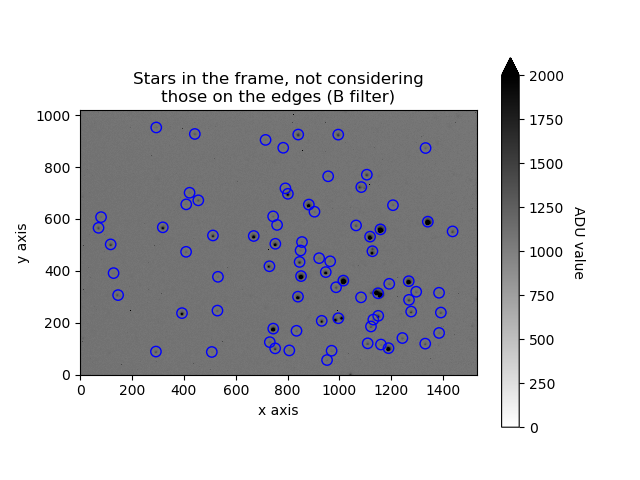

In [16]:
#blue filter


List_b = list(zip(baricenter_x_b, baricenter_y_b))
#print(List)

Filtered_list_b = [(x,y) for x, y in List_b if x>20 and x<1510 and y>20 and y<1000]
print('Number of stars (blue filter) not counting those on the edges of the frame:', len(Filtered_list_b))

fig,ax = plt.subplots(1)
ax.set_aspect('equal')

plt.imshow(blue, cmap='gray_r', origin='lower')
plt.clim(0,2000)
clb = plt.colorbar(extend='max')
clb.set_label('ADU value', rotation=270, labelpad=15)
plt.ylabel('y axis')
plt.xlabel('x axis')


for xx,yy in Filtered_list_b:
    circ = Circle((xx,yy), radius=20, color='b', fill=False)
    ax.add_patch(circ)
plt.title('Stars in the frame, not considering''\n''those on the edges (B filter)')
plt.show()
plt.savefig('m36_blue_stars_not_in_edges.png')

Number of stars not counting those on the edges of the frame: 74


<IPython.core.display.Javascript object>


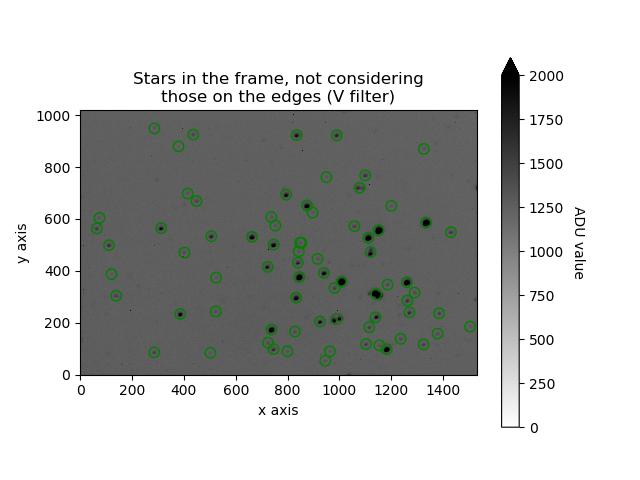

In [17]:
#green filter

List_g = list(zip(baricenter_x_g, baricenter_y_g))
#print(List_g)

Filtered_list_g = [(x,y) for x, y in List_g if x>20 and x<1510 and y>20 and y<1000]
print('Number of stars not counting those on the edges of the frame:', len(Filtered_list_g))

fig,ax = plt.subplots(1)
ax.set_aspect('equal')

plt.imshow(green, cmap='gray_r', origin='lower')
plt.clim(0,2000)
clb = plt.colorbar(extend='max')
clb.set_label('ADU value', rotation=270, labelpad=15)
plt.ylabel('y axis')
plt.xlabel('x axis')

for xx,yy in Filtered_list_g:
    circ = Circle((xx,yy), radius=20, color='g', fill=False)
    ax.add_patch(circ)

plt.title('Stars in the frame, not considering''\n''those on the edges (V filter)')
plt.show()
plt.savefig('m36_green_stars_not_in_edges.png')

In [18]:
#blue filter, flux and magnitude calculation of stars
#radius is 12 pixels

fluxes_b = []
err_fluxes_b = []
radius = 12


for mu_x, mu_y in Filtered_list_b: 

    flux=0  
    iMin = int(mu_x) - radius - 1
    iMax = int(mu_x) + radius + 1
    jMin = int(mu_y) - radius - 1
    jMax = int(mu_y) + radius + 1
    for j in range(jMin, jMax,1):
        for i in range(iMin, iMax,1):
            if (int(mu_x) - i)**2 + (int(mu_y) - j)**2 < radius**2:        
                Gain=2.39
                flux = flux + (blue[j,i] - bck_b[j,i])
                Flux = (flux*Gain)
                flux_err = (flux + blue[j,i])
                sigma_f = np.sqrt(flux_err) * Gain
    fluxes_b.append(Flux)
    err_fluxes_b.append(sigma_f)
    
print('stars found:', len(fluxes_b))
print(np.max(fluxes_b))
print(fluxes_b[32])
   



#table
r = range(1, len(fluxes_b)+1, 1)
a = r
f = fluxes_b
#f1 = error_flux
#i = magnitude_b
#i1 = magnitude_error

#t1 = Table([a, b, c], names = ('\n''star number', 'mu_x', 'mu_y'))
t2 = Table([a, f], names = ('\n' '\n' 'star number', 'flux B'))
#t5 = Table([a, i, i1], names = ('\n' '\n' 'star number', 'magnitude', 'magnitude error'))

#print(t1)
#print(t2)
#print(t5)


stars found: 79
2122561.39
2122561.39


In [19]:
#green filter, flux and magnitude calculation of stars
#radius is 12 pixels

fluxes_g = []
err_fluxes_g = []
radius = 12


for mu_x, mu_y in Filtered_list_g: 
    flux=0
    flux_err= 0
    iMin = int(mu_x) - radius - 1
    iMax = int(mu_x) + radius + 1
    jMin = int(mu_y) - radius - 1
    jMax = int(mu_y) + radius + 1
    for j in range(jMin, jMax,1):
        for i in range(iMin, iMax,1):
            if (int(mu_x) - i)**2 + (int(mu_y) - j)**2 < radius**2:
                Gain=2.39
                flux = flux + (green[j,i] - bck_g[j,i])
                Flux = (flux*Gain)
                flux_err = (flux + green[j,i]) * Gain
                sigma_f = np.sqrt(flux_err)
    fluxes_g.append(Flux)
    err_fluxes_g.append(sigma_f)
    
print('stars found:', len(fluxes_g))
print(np.max(fluxes_g))
print(fluxes_g[30])

#print(err_fluxes_g[30])


#table
r = range(1, len(fluxes_g)+1, 1)
a = r
f = fluxes_g
#f1 = error_flux
#i = magnitude_g
#i1 = magnitude_error

#t1 = Table([a, b, c], names = ('\n''star number', 'mu_x', 'mu_y'))
t2 = Table([a, f], names = ('\n' '\n' 'star number', 'flux V'))
#t5 = Table([a, i, i1], names = ('\n' '\n' 'star number', 'magnitude', 'magnitude error'))

#print(t1)
#print(t2)
#print(t5)

stars found: 74
2615943.43
2615943.43


In [20]:
#find the brigthest star in both b and v filters

print('b filter flux of brightest star:', np.max(fluxes_b))
print('flux index:', fluxes_b.index(np.max(fluxes_b)))


print('g filter flux of brightest star:', np.max(fluxes_g))
print('flux index:', fluxes_g.index(np.max(fluxes_g)))


#find barycenter of these stars
print('mu_x in B:', Filtered_list_b[32][0])
print('mu_y in B:', Filtered_list_b[32][1])


print('mu_x in V:', Filtered_list_g[30][0])
print('mu_y in V:', Filtered_list_g[30][1])



b filter flux of brightest star: 2122561.39
flux index: 32
g filter flux of brightest star: 2615943.43
flux index: 30
mu_x in B: 1014.9293706259401
mu_y in B: 362.0724930530129
mu_x in V: 1008.0498850265006
mu_y in V: 358.3199279501761


<IPython.core.display.Javascript object>


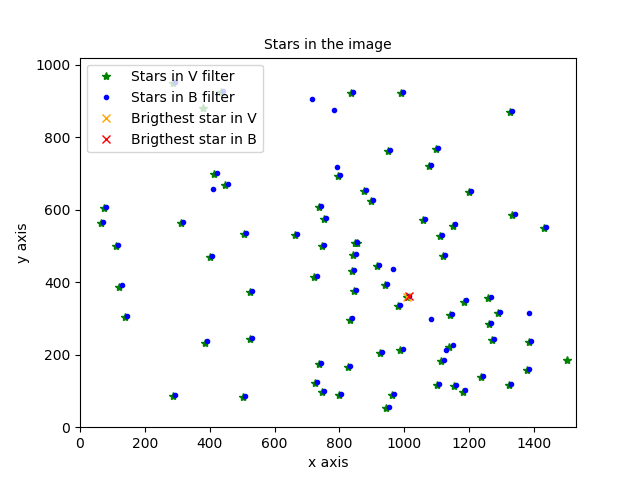

<IPython.core.display.Javascript object>


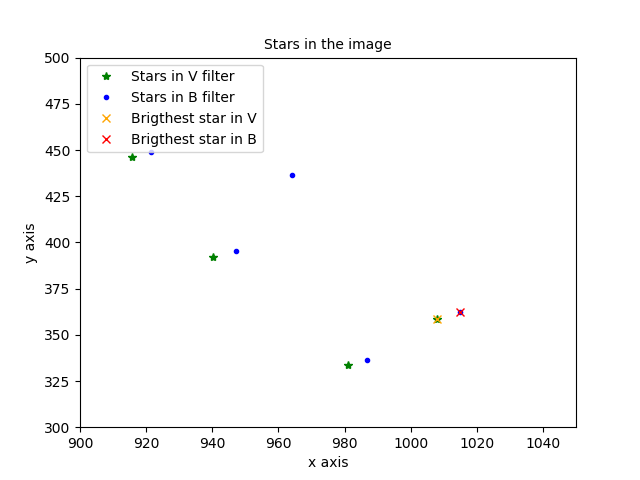

In [21]:
#plot B and V to see their offset

mu_x_b, mu_y_b = zip(*Filtered_list_b)
mu_x_b, mu_y_b = (list(mu_x_b),list(mu_y_b))

mu_x_g, mu_y_g = zip(*Filtered_list_g)
mu_x_g, mu_y_g = (list(mu_x_g),list(mu_y_g))

plt.figure()
plt.plot(mu_x_g, mu_y_g,'*', color = 'g',  label='Stars in V filter')
plt.plot(mu_x_b, mu_y_b,'.', color = 'b',  label='Stars in B filter')
plt.plot(mu_x_g[30], mu_y_g[30],'x', color = 'orange',  label='Brigthest star in V')
plt.plot(mu_x_b[32], mu_y_b[32],'x', color = 'r',  label='Brigthest star in B')
plt.xlabel('x axis', fontsize=10)
plt.ylabel('y axis', fontsize=10)
plt.title('Stars in the image', fontsize=10)
plt.legend(prop={'size': 10}, loc='upper left')
plt.xlim(0, xsize)
plt.ylim(0, ysize)
plt.show()
plt.savefig('m36_offset_stars.png')


plt.figure()
plt.plot(mu_x_g, mu_y_g,'*', color = 'g',  label='Stars in V filter')
plt.plot(mu_x_b, mu_y_b,'.', color = 'b',  label='Stars in B filter')
plt.plot(mu_x_g[30], mu_y_g[30],'x', color = 'orange',  label='Brigthest star in V')
plt.plot(mu_x_b[32], mu_y_b[32],'x', color = 'r',  label='Brigthest star in B')
plt.xlabel('x axis', fontsize=10)
plt.ylabel('y axis', fontsize=10)
plt.title('Stars in the image', fontsize=10)
plt.legend(prop={'size': 10}, loc='upper left')
plt.xlim(900, 1050)
plt.ylim(300, 500)
plt.show()
plt.savefig('m36_offset_stars_zoom.png')

6.879485599439477 3.7525651028367975


<IPython.core.display.Javascript object>


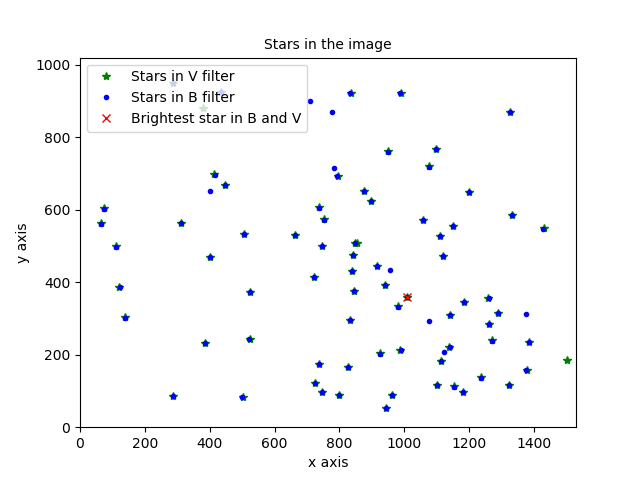

In [22]:
#calculate separation between brightest stars in B and V filters

Delta_mu_x = mu_x_b[32] - mu_x_g[30]
Delta_mu_y = mu_y_b[32] - mu_y_g[30]
print(Delta_mu_x, Delta_mu_y)



#now tell all the blue stars to move by that delta x and y
mu_x_B = [item-Delta_mu_x for item in mu_x_b]
mu_y_B = [item-Delta_mu_y for item in mu_y_b]




#plot
plt.figure()
plt.plot(mu_x_g, mu_y_g,'*', color = 'g',  label='Stars in V filter')
plt.plot(mu_x_B, mu_y_B,'.', color = 'b',  label='Stars in B filter')
plt.plot(mu_x_g[30], mu_y_g[30],'x', color = 'r',  label='Brightest star in B and V')
plt.xlabel('x axis', fontsize=10)
plt.ylabel('y axis', fontsize=10)
plt.title('Stars in the image', fontsize=10)
plt.legend(prop={'size': 10}, loc='upper left')
plt.xlim(0, xsize)
plt.ylim(0, ysize)
plt.show()
plt.savefig('m36_matched_stars.png')

79


<IPython.core.display.Javascript object>


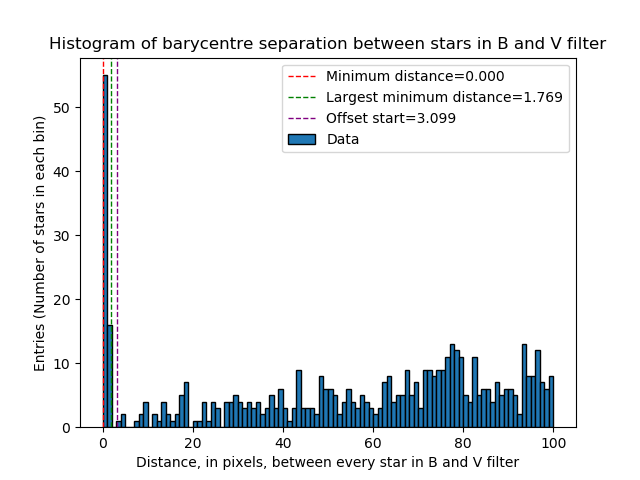

<IPython.core.display.Javascript object>


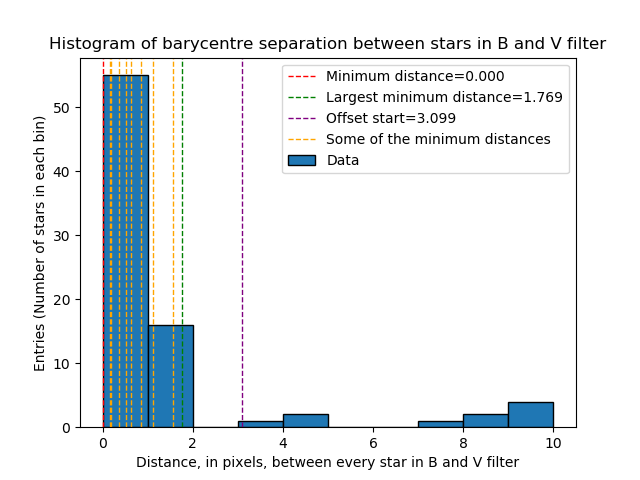

'\n# plot histogram. select one star and see how the separation changes\nd1=[]\nfor mu_x_V_j, mu_y_V_j in Filtered_list_g:\n    distance_fixed_star = np.sqrt(abs((mu_x_B[50] - mu_x_V_j)**2 - (mu_y_B[50] - mu_y_V_j)**2))\n    d1.append(distance_fixed_star)\n#print(d1)\n\nd1.sort()\nbins = np.linspace(0, np.max(d1), 76)\ndata_entries, bins = np.histogram(d1, bins=bins)\nbinscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])\n\n\nplt.figure()\nplt.bar(binscenters, data_entries, width=bins[1] - bins[0], label=\'Histogram\', edgecolor=\'k\')\nplt.title("Selected Star")    \nplt.xlabel("Distance between stars in pixel units")\nplt.ylabel("Entries")\nplt.axvline(np.min(d1), color=\'k\', linestyle=\'dashed\', linewidth=1, label=\'Min distance=%5.3f\' % np.min(d1))\nplt.axvline(d1[1], color=\'r\', linestyle=\'dashed\', linewidth=1, label=\'Second Min distance=%5.3f\' % d1[1])\nplt.axvline(d1[2], color=\'orange\', linestyle=\'dashed\', linewidth=1, label=\'Third Min di

In [23]:
#Plot Histogram of stars to see separation to the other stars


Filtered_list_B = list(zip(mu_x_B, mu_y_B))
print(len(Filtered_list_B))

d=[]
for mu_x_B_i, mu_y_B_i in Filtered_list_B:
    for mu_x_V_j, mu_y_V_j in Filtered_list_g:
        distance = np.sqrt(abs((mu_x_B_i - mu_x_V_j)**2 - (mu_y_B_i - mu_y_V_j)**2))
        d.append(distance)


d.sort()


'''
bins = np.linspace(0, np.max(d), np.max(d)+1)
data_entries, bins = np.histogram(d, bins=bins)
binscenters = np.array([0.5*(bins[i] + bins[i+1]) for i in range(len(bins)-1)])

plt.figure()
plt.bar(binscenters, data_entries, width=bins[1] - bins[0], label='Histogram')
plt.title("Separation Histogram")    
plt.xlabel("Distance between stars in pixel units")
plt.ylabel("Entries")
#plt.axvline(np.min(d), color='r', linestyle='dashed', linewidth=1, label='Min distance=%5.3f' % np.min(d))
#plt.axvline(d[1], color='orange', linestyle='dashed', linewidth=1)
#plt.axvline(d[71], color='green', linestyle='dashed', linewidth=1, label='Maximum minimum distance=%5.3f' % d[71])
#plt.axvline(d[72], color='purple', linestyle='dashed', linewidth=1, label='Offset start=%5.3f' % d[72])
#plt.axvline(d[5], color='orange', linestyle='dashed', linewidth=1)
#plt.axvline(d[10], color='orange', linestyle='dashed', linewidth=1)
#plt.axvline(d[20], color='orange', linestyle='dashed', linewidth=1)
#plt.axvline(d[30], color='orange', linestyle='dashed', linewidth=1)
#plt.axvline(d[40], color='orange', linestyle='dashed', linewidth=1)
#plt.axvline(d[50], color='orange', linestyle='dashed', linewidth=1)
#plt.axvline(d[60], color='orange', linestyle='dashed', linewidth=1)
#plt.axvline(d[70], color='orange', linestyle='dashed', linewidth=1)
plt.legend(loc='best')
plt.show()
plt.savefig('m36_separation_histogram_entire.png')
'''





bins = np.linspace(0, 100, 101)
data_entries, bins = np.histogram(d, bins=bins)
binscenters = np.array([0.5*(bins[i] + bins[i+1]) for i in range(len(bins)-1)])

plt.figure()
plt.bar(binscenters, data_entries, width=bins[1] - bins[0], label='Data', edgecolor='k')
plt.title("Histogram of barycentre separation between stars in B and V filter")    
plt.xlabel("Distance, in pixels, between every star in B and V filter")
plt.ylabel("Entries (Number of stars in each bin)")
plt.axvline(np.min(d), color='r', linestyle='dashed', linewidth=1, label='Minimum distance=%5.3f' % np.min(d))
#plt.axvline(d[1], color='orange', linestyle='dashed', linewidth=1)
plt.axvline(d[70], color='green', linestyle='dashed', linewidth=1, label='Largest minimum distance=%5.3f' % d[70])
plt.axvline(d[71], color='purple', linestyle='dashed', linewidth=1, label='Offset start=%5.3f' % d[71])
#plt.axvline(d[5], color='orange', linestyle='dashed', linewidth=1)
#plt.axvline(d[10], color='orange', linestyle='dashed', linewidth=1)
#plt.axvline(d[20], color='orange', linestyle='dashed', linewidth=1)
#plt.axvline(d[30], color='orange', linestyle='dashed', linewidth=1)
#plt.axvline(d[40], color='orange', linestyle='dashed', linewidth=1)
#plt.axvline(d[50], color='orange', linestyle='dashed', linewidth=1)
#plt.axvline(d[60], color='orange', linestyle='dashed', linewidth=1)
#plt.axvline(d[70], color='orange', linestyle='dashed', linewidth=1)
plt.legend(loc='best')
plt.show()
plt.savefig('m36_separation_histogram.png')





bins = np.linspace(0, 10, 11)
data_entries, bins = np.histogram(d, bins=bins)
binscenters = np.array([0.5*(bins[i] + bins[i+1]) for i in range(len(bins)-1)])

plt.figure()
plt.bar(binscenters, data_entries, width=bins[1] - bins[0], label='Data', edgecolor='k')
plt.title("Histogram of barycentre separation between stars in B and V filter")    
plt.xlabel("Distance, in pixels, between every star in B and V filter")
plt.ylabel("Entries (Number of stars in each bin)")
plt.axvline(np.min(d), color='r', linestyle='dashed', linewidth=1, label='Minimum distance=%5.3f' % np.min(d))
#plt.axvline(d[1], color='orange', linestyle='dashed', linewidth=1)
plt.axvline(d[70], color='green', linestyle='dashed', linewidth=1, label='Largest minimum distance=%5.3f' % d[70])
plt.axvline(d[71], color='purple', linestyle='dashed', linewidth=1, label='Offset start=%5.3f' % d[71])
plt.axvline(d[5], color='orange', linestyle='dashed', linewidth=1, label='Some of the minimum distances')
plt.axvline(d[10], color='orange', linestyle='dashed', linewidth=1)
plt.axvline(d[20], color='orange', linestyle='dashed', linewidth=1)
plt.axvline(d[30], color='orange', linestyle='dashed', linewidth=1)
plt.axvline(d[40], color='orange', linestyle='dashed', linewidth=1)
plt.axvline(d[50], color='orange', linestyle='dashed', linewidth=1)
plt.axvline(d[60], color='orange', linestyle='dashed', linewidth=1)
plt.axvline(d[69], color='orange', linestyle='dashed', linewidth=1)
plt.legend(loc='best')
plt.show()
plt.savefig('m36_separation_histogram_zoom.png')




'''
# plot histogram. select one star and see how the separation changes
d1=[]
for mu_x_V_j, mu_y_V_j in Filtered_list_g:
    distance_fixed_star = np.sqrt(abs((mu_x_B[50] - mu_x_V_j)**2 - (mu_y_B[50] - mu_y_V_j)**2))
    d1.append(distance_fixed_star)
#print(d1)

d1.sort()
bins = np.linspace(0, np.max(d1), 76)
data_entries, bins = np.histogram(d1, bins=bins)
binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])


plt.figure()
plt.bar(binscenters, data_entries, width=bins[1] - bins[0], label='Histogram', edgecolor='k')
plt.title("Selected Star")    
plt.xlabel("Distance between stars in pixel units")
plt.ylabel("Entries")
plt.axvline(np.min(d1), color='k', linestyle='dashed', linewidth=1, label='Min distance=%5.3f' % np.min(d1))
plt.axvline(d1[1], color='r', linestyle='dashed', linewidth=1, label='Second Min distance=%5.3f' % d1[1])
plt.axvline(d1[2], color='orange', linestyle='dashed', linewidth=1, label='Third Min distance=%5.3f' % d1[2])
plt.legend(loc='best')
plt.show()
plt.savefig('m36_separation_histogram.png')







#brightest star 
d2=[]
for mu_x_V_j, mu_y_V_j in Filtered_list_g:
    distance_brightest_star = np.sqrt(abs((mu_x_B[32] - mu_x_V_j)**2 - (mu_y_B[32] - mu_y_V_j)**2))
    d2.append(distance_brightest_star)
#print(d2)

d2.sort()

bins = np.linspace(0, np.max(d2), 76)
data_entries, bins = np.histogram(d2, bins=bins)
binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])


plt.figure()
plt.bar(binscenters, data_entries, width=bins[1] - bins[0], label='Histogram', edgecolor='k')
plt.title("Brightest Star")    
plt.xlabel("Distance between stars in pixel units")
plt.ylabel("Entries") 
plt.axvline(np.min(d2), color='k', linestyle='dashed', linewidth=1, label='Min distance=%5.3f' % np.min(d2))
plt.axvline(d2[1], color='r', linestyle='dashed', linewidth=1, label='Second Min distance=%5.3f' % d2[1])
plt.axvline(d2[2], color='orange', linestyle='dashed', linewidth=1, label='Third Min distance=%5.3f' % d2[2])
plt.legend(loc='best')
plt.show()
plt.savefig('m36_separation_histogram_bright_star.png')
'''

In [24]:
#say that new B and V barycenters would have the same flux as found before

Final_B = list(zip(mu_x_B, mu_y_B, fluxes_b, err_fluxes_b))
Final_g = list(zip(mu_x_g, mu_y_g, fluxes_g, err_fluxes_g))


# now i should ignore the V stars without B companion and match the stars 
offset=2.5
B_ = []
V_ = []
for B in Final_B:
    for V in Final_g:
            if V[0]-offset < B[0] < V[0]+offset and V[1]-offset < B[1] < V[1]+offset:
                B_.append(B)
                V_.append(V)

#print(V_)
#print(B_)                    
                    

t1 = Table([Final_B], names = ('Filtered_list_B',))
t2 = Table([Final_g], names = ('Filtered_list_g',))
t3 = Table([B_], names = ('B_',))
t4 = Table([V_], names = ('V_',))

#t1.pprint(max_lines=-1, max_width=-1)
#t2.pprint(max_lines=-1, max_width=-1)
#t3.pprint(max_lines=-1, max_width=-1)
#t4.pprint(max_lines=-1, max_width=-1)


In [25]:
max_flux_B = np.max([x[2] for x in B_])
print(max_flux_B)

max_flux_V = np.max([x[2] for x in V_])
print(max_flux_V)

max_err_flux_B = np.max([x[3] for x in B_])
print(max_err_flux_B)

max_err_flux_V = np.max([x[3] for x in V_])
print(max_err_flux_V)

2122561.39
2615943.43
2254.185613852595
1618.7681551105459


In [26]:
#blue magnitude calculation 

Fluxes_B = [i[2]/max_flux_B for i in B_]
err_Fluxes_B = [(i[3]/max_flux_B) for i in B_]

#print(Fluxes_B, err_Fluxes_B)

magnitude_b=[]
for b in Fluxes_B:
    gain=2.39
    m_i = -2.5 * np.log10(b)
    magnitude_b.append(m_i)

print('stars found:', magnitude_b)


    
magnitude_error_b = []
for err, b in zip(err_Fluxes_B, Fluxes_B):
    error_m_i = abs(-2.5/np.log(10)) * (err/b)
    magnitude_error_b.append(error_m_i)

print('stars found:', magnitude_error_b)



stars found: [4.859815103062447, 3.8532312064814906, 5.625469456004835, 1.0496739327045506, 5.160158833799038, 5.22692025322438, 3.1143258347800913, 4.712916345006953, 3.729178376335992, 3.6598013034715353, 4.540266493305862, 4.138523339121174, 4.582212819869447, 1.1135425363643856, 4.591068519757179, 3.6886434870225764, 2.5475574911387247, 2.3263407338153463, 2.2360795452972013, 3.700102938345613, 3.08852212592586, 4.474269931110033, 3.2772064445823834, 1.6218539028384196, 0.10869524872541309, 3.7296335798384703, 4.122224230794517, 3.729254230334329, -0.0, 4.246448643031517, 0.8119965466767562, 0.7004660696904441, 4.905346455063841, 1.9587132049135385, 5.366104018260814, 2.486925761689725, 2.8944931640491403, 4.731181939226526, 1.874953061280939, 4.38216774017694, 4.984102940061271, 1.827130232556682, 3.0349564241268103, 4.714606938054899, 0.9285701829194813, 1.823590302828895, 2.7180220177764753, 0.12096897467456418, 3.241991887883415, 2.3932569052919597, 3.5302333259956504, 3.700767

In [27]:
#green magnitude calculation 
Fluxes_V = [i[2]/max_flux_V for i in V_]
err_Fluxes_V = [i[3]/max_flux_V for i in V_]



magnitude_g=[]
for g in Fluxes_V:
    m_i = -2.5 * np.log10(g)
    magnitude_g.append(m_i)

print('stars found:', magnitude_g)


  
magnitude_error_g = []
for err, g in zip(err_Fluxes_V, Fluxes_V):
    error_m_i = abs(-2.5/np.log(10)) * (err/g)
    magnitude_error_g.append(error_m_i)

print('stars found:', magnitude_error_g)




stars found: [4.650993324478185, 3.705903301524475, 5.227532883976051, 1.0343756994022357, 4.680447721031276, 4.82050824031054, 3.036346278218009, 4.447957305387673, 3.578179300216026, 3.554107628771603, 4.1705912840891175, 3.92765103994513, 4.153081248221228, 1.0929885711827712, 4.329175581321637, 3.50155350335819, 2.487540343923233, 2.0717314025024183, 1.9705327274268856, 3.5484652568143753, 3.0303478995290742, 4.253829102965782, 3.1888324377945954, 1.5630758509049947, 0.09704190399751936, 3.5439412410821802, 3.9997443833003206, 3.5880512868454013, -0.0, 4.1098475219147685, 0.7849738753778036, 0.6726570105776041, 4.65524532527154, 1.9317031555768596, 5.168263744915499, 2.4044928251261988, 2.7807673220101843, 4.358773618253889, 1.8673805461935447, 3.9955674087548774, 4.802414302652279, 1.7999621319982515, 2.9908668507619067, 4.563352440810137, 0.9314816943575812, 1.7908953345507037, 2.6687155533522504, 0.12542205030902365, 3.1536031492888084, 2.4002677772360625, 3.4405680350518733, 3.

<IPython.core.display.Javascript object>


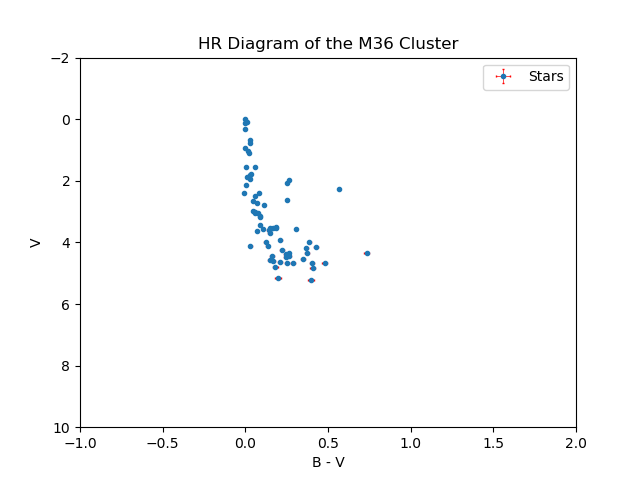

[0.20882177858426143, 0.14732790495701575, 0.39793657202878396, 0.015298233302314834, 0.47971111276776224, 0.4064120129138402, 0.07797955656208222, 0.2649590396192796, 0.150999076119966, 0.1056936746999324, 0.36967520921674435, 0.2108722991760441, 0.42913157164821936, 0.020553965181614453, 0.2618929384355413, 0.18708998366438623, 0.06001714721549156, 0.25460933131292807, 0.26554681787031575, 0.1516376815312377, 0.05817422639678593, 0.22044082814425092, 0.08837400678778806, 0.05877805193342489, 0.011653344727893727, 0.1856923387562901, 0.12247984749419638, 0.1412029434889277, 0.0, 0.13660112111674838, 0.02702267129895264, 0.02780905911284004, 0.25010112979230037, 0.027010049336678943, 0.1978402733453155, 0.08243293656352613, 0.11372584203895597, 0.372408320972637, 0.007572515087394427, 0.38660033142206274, 0.18168863740899166, 0.027168100558430552, 0.0440895733649036, 0.15125449724476248, -0.0029115114380998675, 0.03269496827819118, 0.04930646442422493, -0.004453075634459472, 0.08838873

In [28]:
# HR diagram
plt.figure() 

B_V = []
for i, j in zip(magnitude_b, magnitude_g):
        b_v = i-j
        B_V.append(b_v)
print(B_V)

B_V_err = []
for b_i, g_i in zip(magnitude_error_b, magnitude_error_g):
    bv_err = np.sqrt((b_i)**2 + (g_i)**2)
    B_V_err.append(bv_err)
print(B_V_err)


plt.errorbar(B_V, magnitude_g, xerr = B_V_err, yerr = magnitude_error_g, fmt='.', label='Stars', ecolor='r', capsize=1, linewidth=0.5)
plt.ylim(10, -2)
plt.xlim(-1,2)
plt.title("HR Diagram of the M36 Cluster")    
plt.xlabel("B - V")
plt.ylabel("V") 
plt.legend()
plt.show()
plt.savefig('m36_hr_err.png')

<IPython.core.display.Javascript object>


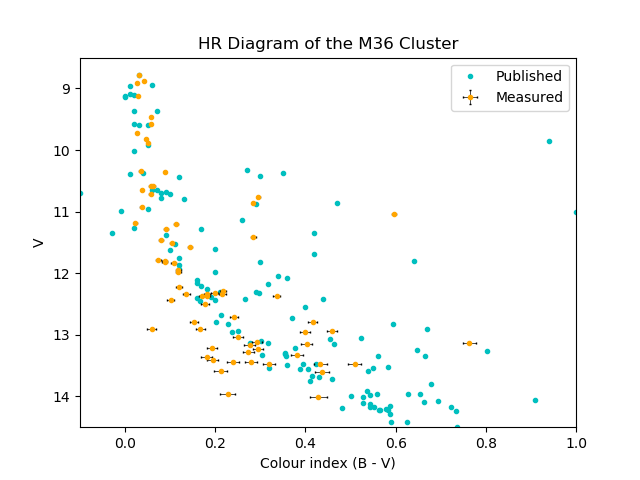

In [29]:
#calibrated B and V

B_published=[14.514, 8.82, 12.488, 12.679, 14.514, 9.38, 14.782, 14.792, 14.675, 15.683, 9.13, 10.86, 10.93, 13.052, 14.111, 14.746, 10.98, 13.182, 10.82, 10.77, 15.673, 12.624, 15.341, 14.013, 17.27, 14.638, 16.001, 11.47, 16.248, 14.971, 16.687, 9.63, 14.581, 9.6, 9.43, 11.09, 12.06, 12.57, 10.56, 11.81, 12.591, 11.99, 8.97, 12.996, 15.257, 14.659, 13.664, 15.658, 13.901, 15.524, 15.039, 14.091, 14.5, 13.632, 13.65, 13.105, 9.97, 16.429, 13.583, 15.877, 15.129, 15.94, 15.964, 13.862, 16.56, 17.522, 14.165, 13.695, 12.27, 11.458, 12.568, 13.407, 10.71, 12.63, 13.966, 14.718, 14.999, 10.03, 10.41, 14.743, 13.567, 9.1, 12.86, 11.72, 14.377, 12.05, 13.521, 16.972, 16.749, 16.17, 16.384, 15.762, 13.451, 12.04, 16.337, 11.88, 10.72, 14.177, 13.902, 11.01, 18.314, 14.802, 15.729, 15.431, 17.49, 14.075, 18.67, 12.32, 12.893, 16.221, 13.844, 13.569, 16.524, 15.897, 14.532, 16.269, 14.617, 12.12, 12.51, 16.359, 14.717, 16.293, 12.18, 13.876, 18.442, 16.683, 17.957, 15.231, 13.405, 16.313, 15.976, 16.893, 14.764, 15.666, 12.38, 10.78, 18.453, 10.6, 14.444, 16.914, 11.64, 11.76, 17.773, 16.792, 14.11, 15.387, 16.824, 18.409, 9.14, 16.2, 12, 17.793, 9, 14.878, 16.373, 17.264, 16.59, 16.907, 18.827, 14.133, 13.417, 16.297, 15.776, 17.366, 10.4, 19.524, 11.17, 17.331, 16.415, 14.972, 12.614, 16.289, 17.621, 17.612, 14.893, 16.408, 16.915, 15.917, 15.338, 14.484, 16.556, 13.887, 13.937, 16.59, 16.745, 18.751, 12.44, 16.587, 17.023, 16.279, 13.194, 11.28, 12.43, 16.59, 12.38, 10.59, 16.903, 14.062, 16.325, 17.75, 10.8, 11.31, 16.562, 12.78, 16.142, 16.386, 15.934, 11.2, 14.783, 9.65, 11.39, 16.378, 16.749, 16.38, 16.743, 12.952, 18.329, 16.624, 17.054, 15.921, 17.974, 15.163, 12.11, 17.07, 16.232, 15.982, 16.413, 13.605, 15.554, 18.282, 12.443, 16.797, 17.784, 17.202, 10.72, 16.495, 16.056, 10.72, 16.963, 17.155, 9.12, 16.898, 17.807, 16.577, 11.33, 15.864]
V_published=[13.955, 8.79, 12.171, 12.414, 13.971, 9.36, 14.203, 14.226, 14.194, 14.946, 9.13, 10.78, 10.8, 12.824, 13.529, 14.084, 10.99, 12.931, 10.72, 10.68, 14.937, 12.327, 14.695, 13.348, 16.463, 14.111, 15.167, 11.38, 15.403, 14.063, 15.851, 9.6, 13.953, 9.58, 9.36, 11.23, 12.32, 12.38, 10.44, 11.61, 12.3, 11.87, 8.96, 12.795, 14.603, 14.116, 13.309, 15.033, 13.477, 14.658, 14.413, 13.541, 14, 13.329, 13.296, 12.735, 9.92, 15.478, 13.207, 15.163, 14.546, 15.233, 15.222, 13.543, 15.794, 16.566, 13.755, 13.338, 12.11, 11.29, 12.409, 13.106, 10.65, 12.43, 13.56, 14.165, 14.41, 10.01, 10.37, 14.155, 12.898, 9.09, 12.42, 11.62, 13.091, 11.93, 13.067, 16.102, 15.811, 15.3, 15.609, 14.989, 13.134, 12.47, 15.397, 11.76, 10.65, 13.718, 13.342, 10.96, 16.65, 14.22, 15.043, 14.786, 16.659, 13.661, 17.694, 12.16, 12.68, 15.446, 13.486, 13.046, 15.606, 15.159, 14.005, 15.535, 13.964, 11.82, 12.3, 15.529, 14.174, 15.46, 11.98, 13.481, 17.392, 15.87, 16.993, 14.496, 13.128, 15.496, 15.301, 15.943, 14.069, 14.963, 12.212, 10.7, 17.456, 10.7, 13.907, 15.99, 11.53, 11.34, 16.584, 16.047, 13.68, 14.75, 15.941, 17.415, 9.14, 15.376, 11, 16.896, 8.94, 14.291, 15.388, 16.481, 15.631, 16.011, 17.737, 13.594, 12.822, 15.4, 15.003, 16.439, 10.39, 18.19, 10.88, 16.35, 15.599, 14.238, 12.448, 15.552, 16.596, 16.651, 14.171, 15.699, 16.189, 15.11, 14.741, 13.805, 15.718, 13.24, 13.548, 15.703, 16.046, 17.695, 11.8, 15.625, 16.337, 15.326, 12.957, 11.26, 12.07, 15.646, 12.04, 10.32, 15.943, 13.26, 15.56, 16.82, 9.86, 11.34, 15.804, 11.65, 15.066, 15.604, 15.106, 10, 14.22, 9.6, 11.13, 15.59, 15.888, 15.609, 15.91, 12.552, 17.39, 15.77, 16.144, 15.206, 16.983, 14.615, 11.69, 16.203, 15.42, 15.318, 15.636, 13.142, 15.006, 16.99, 12.262, 15.935, 16.767, 16.344, 10.37, 15.664, 15.41, 10.42, 16.267, 15.684, 9.1, 16.073, 16.579, 15.804, 10.86, 15.122]
B_V_published = [B_i - V_i for B_i, V_i in zip(B_published, V_published)]



calibrated_V_brightest = 8.79
calibrated_B_brightest = 8.82

V_calibrated = [x+calibrated_V_brightest for x in magnitude_g]
B_calibrated = [x+calibrated_B_brightest for x in magnitude_b]

B_V_cali = []
for i, j in zip(B_calibrated, V_calibrated):
        b_v = i-j
        B_V_cali.append(b_v)

'''        
#recalculate the error in magnitudeB and V with the calibrated magnitudes
magnitude_error_V_cali = []
for err, g in zip(error_flux_g, V_):
    error_m_i = abs(-2.5/np.log(10)) * (err/g[2])
    magnitude_error_V_cali.append(error_m_i)

    
magnitude_error_B_cali = []
for err, b in zip(error_flux_b, B_):
    error_m_i = abs(-2.5/np.log(10)) * (err/b[2])
    magnitude_error_B_cali.append(error_m_i)


B_V_err_cali = []
for b_i, g_i in zip(magnitude_error_B_cali, magnitude_error_V_cali):
    bv_err = np.sqrt((b_i)**2 + (g_i)**2)
    B_V_err_cali.append(bv_err)
    
'''
    
#xerr=B_V_err, yerr=magnitude_error_g, 
plt.figure()
x1, y1 = [0.03, 0.07], [8.83, 11.5]
x2, y2 = [0.07, 0.3], [11.5, 13.6]

plt.plot(B_V_published, V_published, '.', color='c', label='Published')
plt.errorbar(B_V_cali, V_calibrated, xerr = B_V_err, yerr = magnitude_error_g, fmt='.', label='Measured', ecolor='k', capsize=1, linewidth=0.5, color='orange')


plt.ylim(19,8)
plt.xlim(-0.5,2)
plt.title("HR Diagram of the M36 Cluster")    
plt.xlabel("Colour index (B - V)")
plt.ylabel("V") 
plt.legend()
plt.show()
plt.ylim(14.5,8.5)
plt.xlim(-0.1,1)
plt.savefig('m36_hr_comparison_aladin.png')

<IPython.core.display.Javascript object>


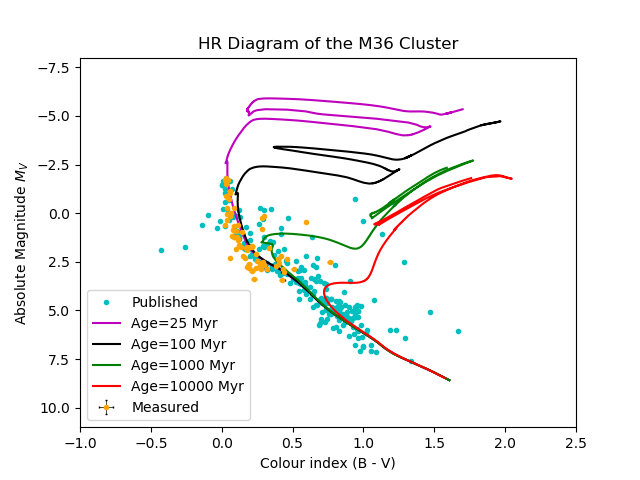

[0.03912319080458418, 0.039101896669953395, 0.039151330765415236, 0.03908888920314143, 0.03912424313401427, 0.039129708380718116, 0.03909524666743312, 0.039116722106404454, 0.03910027152802071, 0.03909998701017315, 0.03910984984093021, 0.0391052352129119, 0.03910947433577758, 0.03908895454196686, 0.0391135670142308, 0.03909939149712761, 0.039092226466910955, 0.039090780014045805, 0.039090505482519786, 0.03909992177257806, 0.039095205372867745, 0.039111725098425656, 0.03909640776926146, 0.03908962868538817, 0.039088210509431766, 0.03909987231190485, 0.039106478814514435, 0.039100397131753194, 0.03908816817993485, 0.03910858206940828, 0.039088648093251153, 0.039088556386782214, 0.03912327994096194, 0.0390904066076447, 0.039147563385279895, 0.03909189019789527, 0.039093645683365146, 0.03911430034331427, 0.039090253281409984, 0.03910641979250876, 0.03912886114611137, 0.0390900973993276, 0.03909493390562892, 0.03912019543292295, 0.039088782984488916, 0.039090077382778914, 0.0390930560007205

In [30]:
plt.figure()

B_published=[14.514, 8.82, 12.488, 12.679, 14.514, 9.38, 14.782, 14.792, 14.675, 15.683, 9.13, 10.86, 10.93, 13.052, 14.111, 14.746, 10.98, 13.182, 10.82, 10.77, 15.673, 12.624, 15.341, 14.013, 17.27, 14.638, 16.001, 11.47, 16.248, 14.971, 16.687, 9.63, 14.581, 9.6, 9.43, 11.09, 12.06, 12.57, 10.56, 11.81, 12.591, 11.99, 8.97, 12.996, 15.257, 14.659, 13.664, 15.658, 13.901, 15.524, 15.039, 14.091, 14.5, 13.632, 13.65, 13.105, 9.97, 16.429, 13.583, 15.877, 15.129, 15.94, 15.964, 13.862, 16.56, 17.522, 14.165, 13.695, 12.27, 11.458, 12.568, 13.407, 10.71, 12.63, 13.966, 14.718, 14.999, 10.03, 10.41, 14.743, 13.567, 9.1, 12.86, 11.72, 14.377, 12.05, 13.521, 16.972, 16.749, 16.17, 16.384, 15.762, 13.451, 12.04, 16.337, 11.88, 10.72, 14.177, 13.902, 11.01, 18.314, 14.802, 15.729, 15.431, 17.49, 14.075, 18.67, 12.32, 12.893, 16.221, 13.844, 13.569, 16.524, 15.897, 14.532, 16.269, 14.617, 12.12, 12.51, 16.359, 14.717, 16.293, 12.18, 13.876, 18.442, 16.683, 17.957, 15.231, 13.405, 16.313, 15.976, 16.893, 14.764, 15.666, 12.38, 10.78, 18.453, 10.6, 14.444, 16.914, 11.64, 11.76, 17.773, 16.792, 14.11, 15.387, 16.824, 18.409, 9.14, 16.2, 12, 17.793, 9, 14.878, 16.373, 17.264, 16.59, 16.907, 18.827, 14.133, 13.417, 16.297, 15.776, 17.366, 10.4, 19.524, 11.17, 17.331, 16.415, 14.972, 12.614, 16.289, 17.621, 17.612, 14.893, 16.408, 16.915, 15.917, 15.338, 14.484, 16.556, 13.887, 13.937, 16.59, 16.745, 18.751, 12.44, 16.587, 17.023, 16.279, 13.194, 11.28, 12.43, 16.59, 12.38, 10.59, 16.903, 14.062, 16.325, 17.75, 10.8, 11.31, 16.562, 12.78, 16.142, 16.386, 15.934, 11.2, 14.783, 9.65, 11.39, 16.378, 16.749, 16.38, 16.743, 12.952, 18.329, 16.624, 17.054, 15.921, 17.974, 15.163, 12.11, 17.07, 16.232, 15.982, 16.413, 13.605, 15.554, 18.282, 12.443, 16.797, 17.784, 17.202, 10.72, 16.495, 16.056, 10.72, 16.963, 17.155, 9.12, 16.898, 17.807, 16.577, 11.33, 15.864]
V_published=[13.955, 8.79, 12.171, 12.414, 13.971, 9.36, 14.203, 14.226, 14.194, 14.946, 9.13, 10.78, 10.8, 12.824, 13.529, 14.084, 10.99, 12.931, 10.72, 10.68, 14.937, 12.327, 14.695, 13.348, 16.463, 14.111, 15.167, 11.38, 15.403, 14.063, 15.851, 9.6, 13.953, 9.58, 9.36, 11.23, 12.32, 12.38, 10.44, 11.61, 12.3, 11.87, 8.96, 12.795, 14.603, 14.116, 13.309, 15.033, 13.477, 14.658, 14.413, 13.541, 14, 13.329, 13.296, 12.735, 9.92, 15.478, 13.207, 15.163, 14.546, 15.233, 15.222, 13.543, 15.794, 16.566, 13.755, 13.338, 12.11, 11.29, 12.409, 13.106, 10.65, 12.43, 13.56, 14.165, 14.41, 10.01, 10.37, 14.155, 12.898, 9.09, 12.42, 11.62, 13.091, 11.93, 13.067, 16.102, 15.811, 15.3, 15.609, 14.989, 13.134, 12.47, 15.397, 11.76, 10.65, 13.718, 13.342, 10.96, 16.65, 14.22, 15.043, 14.786, 16.659, 13.661, 17.694, 12.16, 12.68, 15.446, 13.486, 13.046, 15.606, 15.159, 14.005, 15.535, 13.964, 11.82, 12.3, 15.529, 14.174, 15.46, 11.98, 13.481, 17.392, 15.87, 16.993, 14.496, 13.128, 15.496, 15.301, 15.943, 14.069, 14.963, 12.212, 10.7, 17.456, 10.7, 13.907, 15.99, 11.53, 11.34, 16.584, 16.047, 13.68, 14.75, 15.941, 17.415, 9.14, 15.376, 11, 16.896, 8.94, 14.291, 15.388, 16.481, 15.631, 16.011, 17.737, 13.594, 12.822, 15.4, 15.003, 16.439, 10.39, 18.19, 10.88, 16.35, 15.599, 14.238, 12.448, 15.552, 16.596, 16.651, 14.171, 15.699, 16.189, 15.11, 14.741, 13.805, 15.718, 13.24, 13.548, 15.703, 16.046, 17.695, 11.8, 15.625, 16.337, 15.326, 12.957, 11.26, 12.07, 15.646, 12.04, 10.32, 15.943, 13.26, 15.56, 16.82, 9.86, 11.34, 15.804, 11.65, 15.066, 15.604, 15.106, 10, 14.22, 9.6, 11.13, 15.59, 15.888, 15.609, 15.91, 12.552, 17.39, 15.77, 16.144, 15.206, 16.983, 14.615, 11.69, 16.203, 15.42, 15.318, 15.636, 13.142, 15.006, 16.99, 12.262, 15.935, 16.767, 16.344, 10.37, 15.664, 15.41, 10.42, 16.267, 15.684, 9.1, 16.073, 16.579, 15.804, 10.86, 15.122]
B_V_published = [B_i - V_i for B_i, V_i in zip(B_published, V_published)]


calibrated_V_brightest = 8.79
calibrated_B_brightest = 8.82

V_calibrated = [x+calibrated_V_brightest for x in magnitude_g]
B_calibrated = [x+calibrated_B_brightest for x in magnitude_b]

B_V_cali = []
for i, j in zip(B_calibrated, V_calibrated):
        b_v = i-j
        B_V_cali.append(b_v)
        

absolute_M_measured = []

for m in V_calibrated:
    D = 1318
    D_err = 120
    M = m - (5 * np.log10(D)) + 5
    absolute_M_measured.append(M)

    
    
absolute_M_measured_err=[]
for m, err_m in zip(V_calibrated, magnitude_error_g):
    D = 1318
    D_err = 120
    M_err = (err_m**2) + ((-5/(D*np.log(10)))**2 * D_err**2)
    absolute_M_measured_err.append(M_err)
    
    
    
    
absolute_M_pub = []

for m in V_published:
    D = 1318
    M = m - (5 * np.log10(D)) + 5
    absolute_M_pub.append(M)
    
    

plt.plot(B_V_published, absolute_M_pub, '.', color='c', label='Published')
plt.errorbar(B_V_cali, absolute_M_measured, xerr = B_V_err, yerr = absolute_M_measured_err, fmt='.', label='Measured', ecolor='k', capsize=1, linewidth=0.5, color='orange')


#Z= 0.004   Y=0.251
data25=np.loadtxt('iso25.txt', usecols=(6,4))
plt.plot(data25[:,0]+0.25, data25[:,1], label='Age=25 Myr', color='m')

data100=np.loadtxt('iso100.txt', usecols=(6,4))
plt.plot(data100[:,0]+0.25, data100[:,1], label='Age=100 Myr', color='k')

data1000=np.loadtxt('iso1000.txt', usecols=(6,4))
plt.plot(data1000[:,0]+0.25, data1000[:,1], label='Age=1000 Myr', color='g')

data10000=np.loadtxt('iso10000.txt', usecols=(6,4))
plt.plot(data10000[:,0]+0.25, data10000[:,1], label='Age=10000 Myr', color='r')

plt.ylim(11,-8)
plt.xlim(-1,2.5)
plt.title("HR Diagram of the M36 Cluster")    
plt.xlabel("Colour index (B - V)")
plt.ylabel("Absolute Magnitude $M_{V}$") 
plt.legend()
plt.show()
plt.savefig('m36_isochronesFit.png', dpi=200)

print(absolute_M_measured_err)
print(magnitude_error_g)

<IPython.core.display.Javascript object>


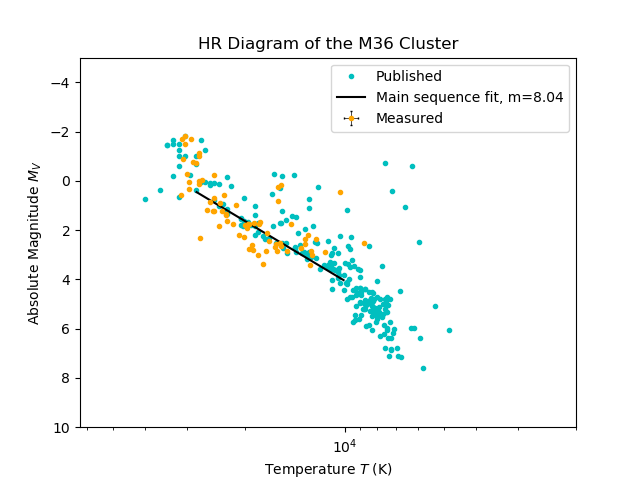

In [31]:
#convert appararent magnitude to absolute magnitude knowing the distance in parsec to the cluster
#absolute magnitude is also luminosity
#should take as reference the sun?

absolute_M = []

for m in V_calibrated:
    D = 1318
    M = m - (5 * np.log10(D)) + 5
    absolute_M.append(M)

    
#now from B-V to temperature

temperature = []

for i in B_V_cali:
    T = 4600 * ((1/((0.92*i)+0.17)) + (1/((0.92*i)+0.62)))
    temperature.append(T)

    
#same for published values

absolute_M_published = []

for m in V_published:
    D = 1318 #parsecs
    M = m - (5 * np.log10(D)) + 5
    absolute_M_published.append(M)

temperature_published = []

for i in B_V_published:
    T = 4600 * ((1/((0.92*i)+0.17)) + (1/((0.92*i)+0.62)))
    temperature_published.append(T)


temperature_err1=[]

for i,j in zip(B_V_err, B_V_cali):
    error_t = 4600 * ((1.564/((0.92*j)+1.7)**2) + (0.5704/((0.92*j)+0.62)**2)) * i
    temperature_err1.append(error_t)

x1, y1 = [28004.1, 10073.2], [0.458957, 4.03039]


plt.figure()
plt.plot(temperature_published, absolute_M_published, '.', label='Published', color='c')
plt.errorbar(temperature, absolute_M, xerr=temperature_err1, yerr = magnitude_error_g, fmt='.', ecolor='k', label='Measured', capsize=1, linewidth=0.5, color='orange')
plt.plot(x1, y1, '-', color='k', label='Main sequence fit, m=8.04')
plt.xscale('log')
plt.ylim(10, -5)
plt.xlim(63e3, 2e3)

x = [20e3, 10e3, 50e3, 4e3]

labels = [r'$20\times10^4$', r'$10^4$', r'$50\times10^4$', r'$4\times10^3$']

#plt.xticks(x, labels)


plt.title("HR Diagram of the M36 Cluster")    
plt.xlabel("Temperature $T$ (K)", visible=True)
plt.ylabel("Absolute Magnitude $M_{V}$") 
plt.legend()
plt.show()
plt.savefig('m36_hr_temperature.png')

/Users/arianna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in log10


<IPython.core.display.Javascript object>


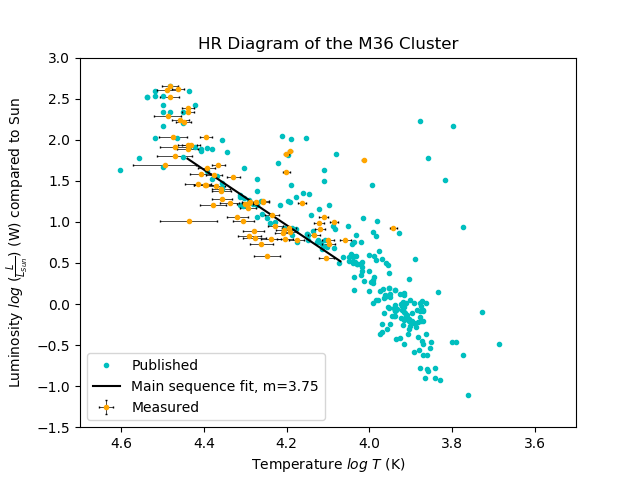

In [32]:
#convert appararent magnitude to absolute magnitude knowing the distance in parsec to the cluster
#absolute magnitude is also luminosity
#should take as reference the sun?

absolute_M = []

for m in V_calibrated:
    D = 1318
    M = m - (5 * np.log10(D)) + 5
    absolute_M.append(M)

    
#now from B-V to temperature

temperature = []

for i in B_V_cali:
    T = 4600 * ((1/((0.92*i)+0.17)) + (1/((0.92*i)+0.62)))
    T2=np.log10(T)
    temperature.append(T2)

    
#same for published values

absolute_M_published = []

for m in V_published:
    D = 1318 #parsecs
    M = m - (5 * np.log10(D)) + 5
    absolute_M_published.append(M)

    
temperature_published = []
for i in B_V_published:
    T = 4600 * ((1/((0.92*i)+0.17)) + (1/((0.92*i)+0.62)))
    T1=np.log10(T)
    temperature_published.append(T1)


temperature_err=[]

for i,j in zip(B_V_err, B_V_cali):
    error_t = 4600 * ((1.564/((0.92*j)+1.7)**2) + (0.5704/((0.92*j)+0.62)**2)) * i
    err=0.434*(i/j)
    temperature_err.append(err)

x1, y1 = [28004.1, 10073.2], [0.458957, 4.03039]


#luminosity
luminosity_measured=[]
for M in absolute_M:
    Lsun = 3.86*(10**26)
    L =10**((4.83-M)/2.5)
    L1=np.log10(L)
    luminosity_measured.append(L1)



luminosity_pub=[]
for M in absolute_M_published:
    Lsun = 3.86*(10**26)
    L =10**((4.83-M)/2.5)
    L2=np.log10(L)
    luminosity_pub.append(L2)

    



plt.figure()
plt.plot(temperature_published, luminosity_pub, '.', label='Published', color='c')
plt.errorbar(temperature, luminosity_measured, xerr=temperature_err, yerr = magnitude_error_g, fmt='.', ecolor='k', label='Measured', capsize=1, linewidth=0.5, color='orange')
plt.xlim(4.7, 3.5)
plt.ylim(-1.5,3)
x1, y1 = [4.44, 4.07], [1.77, 0.52]
plt.plot(x1, y1, '-', color='k', label='Main sequence fit, m=3.75')
plt.title("HR Diagram of the M36 Cluster")    
plt.xlabel("Temperature $log \ T$ (K)", visible=True)
plt.ylabel(r"Luminosity $log \ (\frac{L}{L_{Sun}})$ (W) compared to Sun") 
plt.legend()
plt.show()
plt.savefig('m36_temperature_lumino.png', dpi=200)